# AB-тестирование
## Задание AB.4


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

---

**Баллы за задание:**

* Задача 1 — 30 баллов
* Задача 2 — 60 баллов
* Задача 3 — 40 баллов
* Задача 4 — 100 баллов



In [293]:
# Bot check

# HW_ID: ds_ab4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [294]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import random
import warnings
warnings.filterwarnings("ignore")

from tqdm import tqdm
from statsmodels.stats.proportion import proportion_confint

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from statsmodels.formula.api import ols

from xgboost import XGBRegressor

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import torch
import torch.nn as nn
import torch.optim as optim

sns.set(style='whitegrid', palette='Set2')

---
### Задача 1.

Выведите формулу MDE для относительного t-теста.

$\square$

Решение приложено в pdf

$\blacksquare$

---
### Задача 2.

Продолжим планировать АБ-тест из задачи AB.3.2. Поскольку пользователей достаточно много, предлагается рассмотреть возможность использования метода бакетов. И хотя все данные помещаются в память, отработать навык стоит на простых примерах.

Выберите некоторым образом количество бакетов и обоснуйте свой выбор.

В качестве количества бакетов разумно взять количество уникальных пользователей. Тогда бакеты будут непересекающимися, а значения статистик бакетов -- независимыми

In [295]:
data = pd.read_csv(
    "miptstats_metrica.tsv",
    sep="\t",
)
data["ym:s:dateTimeUTC"] = pd.to_datetime(data["ym:s:dateTimeUTC"])

experiment_start = pd.Timestamp("2023-02-01")
experiment_end = pd.Timestamp("2023-04-30")

april_df = data[
    (data["ym:s:dateTimeUTC"] >= experiment_start)
    & (data["ym:s:dateTimeUTC"] <= experiment_end)
]
april_df = april_df[april_df["ym:s:dateTimeUTC"].dt.month.isin([2, 3, 4])]
april_df.head()

,ym:s:visitID,ym:s:clientID,ym:s:dateTimeUTC,ym:s:startURL,ym:s:endURL,ym:s:pageViews,ym:s:visitDuration,ym:s:isNewUser,ym:s:bounce,ym:s:regionCountry,...,ym:s:browserCountry,ym:s:mobilePhone,ym:s:operatingSystemRoot,ym:s:browser,ym:s:browserEngine,ym:s:screenOrientation,ym:s:screenWidth,ym:s:screenHeight,ym:s:windowClientWidth,ym:s:windowClientHeight
247066,2.693245e+17,0,2023-02-01 00:23:11,https://wiki.yandex.ru/,https://wiki.yandex.ru/,1,0,0,1,Russia,...,NaN,NaN,windows,chrome,WebKit,0,0,0,0,0
247067,2.695624e+17,1675201098741890692,2023-02-01 00:38:18,https://mipt-stats.gitlab.io/courses/python/07...,https://mipt-stats.gitlab.io/courses/python/07...,1,15,1,0,Russia,...,ru,NaN,windows,chrome,WebKit,2,1920,1080,1903,937
247068,2.696383e+17,1675201388255715280,2023-02-01 00:43:08,https://mipt-stats.gitlab.io/courses/python/07...,https://mipt-stats.gitlab.io/courses/python/07...,2,74,1,0,Belarus,...,us,NaN,windows,chrome,WebKit,2,1536,864,750,744
247069,2.700587e+17,1675202994914928490,2023-02-01 01:09:52,https://mipt-stats.gitlab.io/courses/python/04...,https://mipt-stats.gitlab.io/courses/python/04...,1,0,1,1,Russia,...,ru,NaN,windows,firefox,Gecko,2,1280,720,1280,587
247070,2.706447e+17,1675205228364607033,2023-02-01 01:47:07,https://mipt-stats.gitlab.io/courses/python/10...,https://mipt-stats.gitlab.io/courses/python/10...,1,15,1,0,Russia,...,ru,NaN,windows,chrome,WebKit,2,1536,864,1519,745


Выполните разделение на бакеты и проверьте, что количество пользователей в бакетах примерно одинаковое. Подумайте, как лучше выполнить такую проверку.

Уберем польщователей, которых система не смогла определить

In [296]:
april_df = april_df[april_df["ym:s:clientID"] != 0]
april_df["ym:s:clientID"].nunique()

10202

Как видим, всего имеем 10000 бакетов

Выполним разбиение на бакеты.

In [297]:
tmp_df = april_df.groupby("ym:s:clientID").agg({
    "ym:s:dateTimeUTC": "max", 
    "ym:s:pageViews": "mean",
    "ym:s:visitID": "count"
}).reset_index().rename(columns={"ym:s:visitID": "count", "ym:s:pageViews":"sample"})
tmp_df.head()

,ym:s:clientID,ym:s:dateTimeUTC,sample,count
0,167572170736525,2023-02-07 01:15:07,1.000000,1
1,1675350142342549,2023-04-17 09:35:19,3.416667,24
2,1675369618755460,2023-03-27 11:50:25,2.250000,4
3,1675684729252210,2023-02-28 00:13:37,5.125000,32
4,1675765839528739,2023-02-07 13:30:35,2.000000,1


In [298]:
group_sizes = tmp_df["count"]

print(group_sizes.describe())
tmp_df = tmp_df.drop(columns=["count"])

count    10202.000000
mean         3.505195
std         10.381282
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        172.000000
Name: count, dtype: float64


Как видим, в каждом бакете в среднем 3.5 элемента, тем не менее медиана равна 1. Таким образом данные распределены относительно равномерно.

Аналогично задаче AB.3.2 провалидируйте метод бакетов, проведя серию АА-тестов по историческим данным, семплируя момент времени начала эксперимента и сами группы пользователей.

In [299]:
n_iter = 5000
n_iter_power= 1000

In [300]:
def estimate_reject_prob(n_rejects, n_iter):
    """
    Оценка вероятности отвержения критерия и ее дов. интервала.
    Используется для оценки вероятности ошибки первого рода и мощности

    Аргументы:
    n_rejects -- количество отвержений H_0 в эксперименте
    n_iter -- количество экспериментов

    Возвращает:
    prob_reject -- оценка вероятности отвержения критерия
    left_bound, right_bound -- границы соотв. дов. интервала
    """

    prob_reject = n_rejects / n_iter
    left_bound, right_bound = proportion_confint(n_rejects, n_iter, method="wilson")

    return prob_reject, left_bound, right_bound


def visualization(
    prob_reject,
    left_bound,
    right_bound,
    show_pvals=False,
    pvals=None,
    alpha=0.05,
    figsize=(7, 2),
    title=None,
):
    """
    Отрисовка интервала для вероятности отвержения критерия
    и гистограммы p-value (опционально)
    prob_reject -- оценка вероятности отвержения
    left_bound, right_bound -- границы доверительного интервала
    alpha -- теор вероятность ошибки первого рода
    show_pvals -- показывать ли распределение p-value
    pvals -- массив из p-value
    figsize -- размер фигуры matplotlib
    """

    # построение гистограммы p-value (опционально)
    if show_pvals:
        with sns.axes_style("whitegrid"):
            plt.figure(figsize=figsize)
            plt.subplot(1, 2, 1)
            plt.hist(
                pvals,
                bins=np.linspace(0, 1, 21),
                alpha=0.7,
                weights=np.ones(len(pvals)) / len(pvals),
            )
            plt.title("Распределение p-value")

    # отрисовка интервала для вероятности отвержения критерия
    with sns.axes_style("whitegrid"):
        if show_pvals:
            plt.subplot(1, 2, 2)
        else:
            plt.figure(figsize=figsize)
        plt.hlines(0, 0, 1, color="black", lw=2, alpha=0.6)
        plt.vlines(alpha, -1, 1, color="red", lw=5, linestyle="--", alpha=0.6)
        plt.fill_between(
            [left_bound, right_bound], [0.15] * 2, [-0.15] * 2, color="green", alpha=0.6
        )
        plt.scatter(prob_reject, 0, s=300, marker="*", color="red")
        plt.xlim((min(alpha, left_bound) - 1e-3, max(alpha, right_bound) + 1e-3))
        plt.title(
            f"Доля отвержений = {100*prob_reject:.2f}%, "
            f"интервал ({100*left_bound:.2f}%, {100*right_bound:.2f}%)"
        )
        plt.suptitle(title)
        plt.ylim((-0.5, 0.5))
        plt.yticks([])
        plt.tight_layout()
        plt.show()


def draw_power(
    powers,
    left_powers,
    right_powers,
    effects_list=np.linspace(0, 0.25, 11),
    label=None,
    title="Графики мощности",
    new_figure=False,
):
    """
    Построение и отрисовка графика мощности критерия.

    Аргументы:
    powers -- оценка мощности (массив или список массивов/объектов)
    left_powers, right_powers -- границы соотв. доверительного интервала (массив или список)
    effects_list -- сетка эффектов
    label -- подпись графика (строка или список строк)
    title -- заголовок графика
    new_figure -- создавать новую фигуру или нет
    """

    if new_figure:
        plt.figure(figsize=(10, 4))

    # Преобразуем одиночные массивы в списки, если передали только один набор данных
    if not isinstance(powers, (list, tuple)):
        powers = [powers]
        left_powers = [left_powers]
        right_powers = [right_powers]
        label = [label] if label else [None]

    # Рисуем все переданные графики мощности
    for i, (p, lp, rp) in enumerate(zip(powers, left_powers, right_powers)):
        # Если передан объект, извлекаем из него нужные атрибуты
        if hasattr(p, "powers"):
            lp, rp = p.left_powers, p.right_powers
            p = p.powers

        plt.plot(effects_list, p, label=label[i] if label else None, lw=3)
        plt.fill_between(effects_list, lp, rp, alpha=0.3)

    if new_figure:
        plt.hlines(
            0.8,
            effects_list[0],
            effects_list[-1],
            color="black",
            alpha=0.5,
            label="Мощность 0.8 (пересечение — MDE)",
        )

    plt.legend()
    plt.xlabel("Размер относительного эффекта")
    plt.ylabel("Мощность")
    plt.title(title)


def add_effect(x, effect, target_name="pilot", relative_effect=True):
    """
    Функция искусственного добавления эффекта в тестовую выборку

    Аргументы:
    x -- выборка
    effect -- добавляемый эффект
    target_name -- имя столбца с целевой метрикой
    relative_effect -- является ли эффект относительным или абсолютным

    Возвращает:
    x -- выборка с добавленным эффектом
    """

    x_copy = x.copy()
    if relative_effect:
        x_copy[target_name] *= 1 + effect
    else:
        x_copy[target_name] += effect

    return x_copy


def run_experiments(
    test,
    data,
    generate_samples,
    n_iter=10000,
    sample_size=1000,
    effect=0,
    relative_effect=True,
    alpha=0.05,
    target_name="sample",
    draw=False,
    title=None,
    show_pvals=True,
):
    """
    Проведение серии AA-тестов на искусственных выборках.

    Аргументы:
    test -- статистический критерий
    generate_samples -- функции для семплирования выборок
    n_iter -- количество итераций
    sample_size -- размер выборок
    effect -- размер добавляемого эффекта (для оценки мощности)
    relative_effect -- является ли эффект относительным или абсолютным
    alpha -- теор вероятность ошибки первого рода
    target_name -- имя столбца с целевой метрикой
    """

    n_rejects = 0  # количество отвержений H_0
    pvals = []  # значения p-value
    # Проведение экспериментов
    for _ in tqdm(range(n_iter), leave=False):
        # Генерируем выборки
        x_data, y_data = generate_samples(data, sample_size=sample_size)

        # Добавляем эффект, если хотим оценить мощность
        x_data = add_effect(
            x_data, effect, target_name=target_name, relative_effect=relative_effect
        )
        # Применяем критерий
        pvals.append(test(x_data, y_data)[1])
        n_rejects += pvals[-1] < alpha

    # Оценка вероятности отвержения
    prob_reject, left_bound, right_bound = estimate_reject_prob(n_rejects, n_iter)

    # Визуализация
    if draw:
        figsize = (14, 3) if show_pvals else (5, 2)
        visualization(
            prob_reject,
            left_bound,
            right_bound,
            show_pvals,
            pvals,
            alpha,
            figsize,
            title,
        )

    return prob_reject, (left_bound, right_bound)


def estimate_power(
    test,
    data,
    generate_samples,
    n_iter=10000,
    sample_size=1000,
    effects_list=np.linspace(0, 0.25, 11),
    relative_effect=True,
    alpha=0.05,
    target_name="sample",
):
    """
    Проведение серии тестов на искусственных выборках для оценки мощности.

    Аргументы:
    test -- статистический критерий
    generate_samples -- функции для семплирования выборок
    n_iter -- количество итераций
    sample_size -- размер выборок
    effects_list -- список добавляемых эффектов
    relative_effect -- является ли эффект относительным или абсолютным
    alpha -- теор вероятность ошибки первого рода
    target_name -- имя столбца с целевой метрикой
    """

    powers = np.zeros(len(effects_list))
    left_bounds = np.zeros(len(effects_list))
    right_bounds = np.zeros(len(effects_list))

    for i, effect in tqdm(enumerate(effects_list), leave=False):
        powers[i], (left_bounds[i], right_bounds[i]) = run_experiments(
            test,
            data,
            generate_samples,
            n_iter=n_iter,
            sample_size=sample_size,
            effect=effect,
            relative_effect=relative_effect,
            alpha=alpha,
            target_name=target_name,
            draw=False,
        )

    return powers, left_bounds, right_bounds

In [301]:
def generate_sample_by_start_day_bucket(data, sample_size=None):
    if sample_size is None:
        sample_size = len(data) // 2

    FORBIDDEN_DATE = pd.Timestamp("2023-03-30")
    start_date = data["ym:s:dateTimeUTC"].min()
    delta_days = (FORBIDDEN_DATE - start_date).days
    start_date = start_date + pd.Timedelta(days=np.random.randint(0, delta_days))
    data = data.sample(frac=1).reset_index(drop=True)

    first_group = data[data["ym:s:dateTimeUTC"] > start_date].iloc[:sample_size]
    second_group = data[data["ym:s:dateTimeUTC"] > start_date].iloc[sample_size:]
    return first_group, second_group

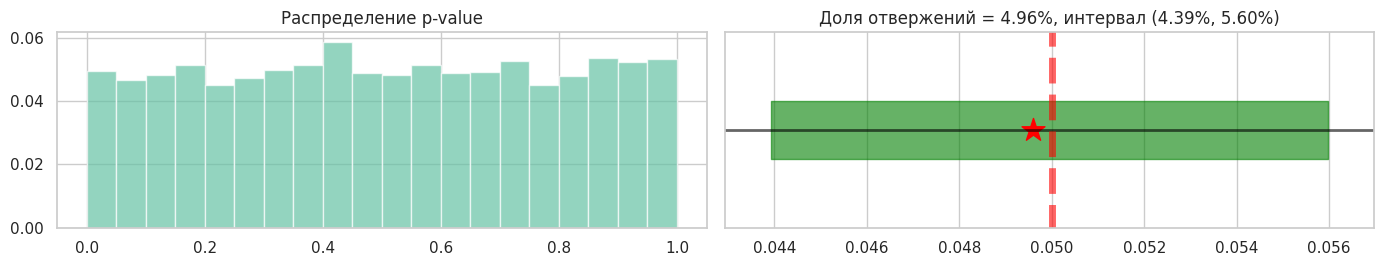

(0.0496, (0.04392008579235035, 0.05597146011975712))

In [302]:
run_experiments(
    test=lambda x, y: sps.ttest_ind(x["sample"], y["sample"]),
    data=tmp_df,
    generate_samples=generate_sample_by_start_day_bucket,
    sample_size=tmp_df.shape[0] // 20,
    n_iter=n_iter,
    draw=True,
)

Теперь посмотрим на мощность.

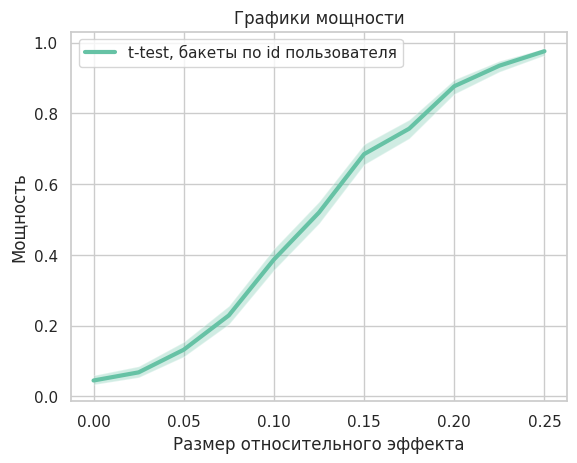

In [303]:
effects_list = np.linspace(0, 0.25, 11)

powers6, left_bounds6, right_bounds6 = estimate_power(
    test=lambda x, y: sps.ttest_ind(x["sample"], y["sample"]),
    data=tmp_df,
    generate_samples=generate_sample_by_start_day_bucket,
    sample_size=tmp_df.shape[0] // 20,
    n_iter=n_iter_power,
    effects_list=effects_list,
)

draw_power(powers6, left_bounds6, right_bounds6, label="t-test, бакеты по id пользователя")

Теперь рассмотрим стратификацию по операционной системе. Выполните разделение на бакеты внутри каждой страты и проверьте равномерность разбиения.

Учтите, что в одном бакете должны быть пользователи только из одной страты, тем самым стратификация возможна на выборке бакетов.

In [304]:
os = april_df["ym:s:operatingSystemRoot"].unique()

os = [x for x in os if x not in ['bsd', 'nan', 'google_chrome_os', 'tizen', np.nan]]
strat_df = april_df[april_df["ym:s:operatingSystemRoot"].isin(os)]

strat_df["strata"] = april_df["ym:s:operatingSystemRoot"]
strat_df = strat_df[["strata", "ym:s:pageViews", "ym:s:clientID"]]
strat_df.rename(columns={"ym:s:pageViews": "sample"}, inplace=True)
strat_df.head()

,strata,sample,ym:s:clientID
247067,windows,1,1675201098741890692
247068,windows,2,1675201388255715280
247069,windows,1,1675202994914928490
247070,windows,1,1675205228364607033
247071,ios_double,2,1674842645925464124


In [305]:
stratified_buckets = strat_df.groupby(['strata', 'ym:s:clientID']).agg({
    'sample': 'mean'
}).reset_index()

Провалидируйте метод бакетов со стратификацией.

In [306]:
def weighted_mean(data, weights):
    '''
    Вычисляет взвешенное среднее.

    :param data: данные
    :param weights: веса страт
    :return: взвешенное среднее
    '''

    strata_means = data.groupby(by='strata')['sample'].mean()
    return (strata_means * weights).sum()


def simple_mean(data, weights):
    '''
    Вычисляет обычное выборочное среднее

    :param data: данные
    :param weights: не используется, нужен для совместимости
    :return: выборочное среднее
    '''

    return data['sample'].mean()

def random_sampler(data, sample_size):
    '''
    Случайное семплирование двух групп одного размера из данных.

    :param data: исходные данные
    :param sample_size: размер группы
    :return: две группы данных
    '''

    choiced = data.sample(n=2 * sample_size)
    return choiced.iloc[:sample_size], choiced.iloc[-sample_size:]


def sample_mean_diff(data, sample_size, n_iter):
    '''
    Реализация итераций семплирования двух случайных групп и вычисления разности средних.

    :param data: исходные данные
    :param sample_size: размер группы
    :param n_iter: количество итераций семплирования
    :return: выборка разности средних
    '''

    mean_sample = np.zeros(n_iter)

    for i in tqdm(range(n_iter)):
        groups = random_sampler(data, sample_size)
        mean_sample[i] = groups[0]['sample'].mean() - groups[1]['sample'].mean()

    return mean_sample


def stratified_sampler(data, sample_size):
    '''
    Стратифицированное семплирование выборок.

    :param data: данные
    :param sample_size: размер выборки
    :return: две выборки
    '''

    # Веса страт
    strata_weights = calculate_strata_weights(data)

    # Размер выборок
    strata_sample_size = np.floor(sample_size * strata_weights + 0.5).astype(int)

    a_group, b_group = [], []
    # Генерируем для каждой страты отдельно
    for i, strata in enumerate(data.groupby(by='strata')):
        a, b = random_sampler(strata[1], strata_sample_size[i])
        a_group.append(a)
        b_group.append(b)

    return pd.concat(a_group), pd.concat(b_group)


def sample_mean_diff(sampler, mean_function, data, sample_size, n_iter):
    '''
    Реализация итераций семплирования двух групп и вычисления разности средних.

    :param sampler: функция семплирования двух групп
    :param mean_function: функция вычисления среднего
    :param data: исходные данные
    :param sample_size: размер группы
    :param n_iter: количество итераций семплирования
    :return: выборка разности средних
    '''

    # Веса страт
    strata_weights = calculate_strata_weights(data)

    mean_sample = np.zeros(n_iter)

    for i in tqdm(range(n_iter)):
        # Семплирование
        groups = sampler(data, sample_size)
        # Вычисление разности средних
        mean_sample[i] = mean_function(groups[0], strata_weights) - mean_function(groups[1], strata_weights)

    return mean_sample

def weighted_var(data, strata_weights):
    '''
    Вычисляет взвешенную дисперсию при стратификации.
    
    :param data: данные
    :param strata_weights: веса страт
    :return: дисперсия
    '''
    
    strata_vars = data.groupby(by='strata')['sample'].var()
    return (strata_vars * strata_weights).sum() / len(data)


def weighted_post_var(data, strata_weights):
    '''
    Вычисляет взвешенную дисперсию при постстратификации.
    
    :param data: данные
    :param strata_weights: веса страт
    :return: дисперсия
    '''
    
    strata_vars = data.groupby(by='strata')['sample'].var()
    weighted_var = (strata_vars * strata_weights).sum() / len(data)
    post_addition = (strata_vars * (1-strata_weights)).sum() / (len(data)**2)
    return weighted_var + post_addition


def simple_var(data, strata_weights):
    '''
    Вычисляет обычную дисперсию при случайном семплировании.

    :param data: данные
    :param strata_weights: веса страт, не используется, нужен для совместимости
    :return: дисперсия
    '''

    return data['sample'].var() / len(data)


def stratified_ttest(x_data, y_data, strata_weights, method='random', alpha=0.05):
    '''
    Стратифицированный абсолютный t-test.
    
    :param x_data: выборка вместе с информацией о стратах
    :param y_data: выборка вместе с информацией о стратах
    :param strata_weights: веса страт
    :param method: метод 'random', 'stratified', 'post_stratified'
    :param alpha: уровень значимости
    :return: статистика критерия, границы доверительного интервала, p-value
    '''
    
    if method == 'random':
        mean_function = simple_mean
        var_function = simple_var
    elif method == 'stratified':
        mean_function = weighted_mean
        var_function = weighted_var
    elif method == 'post_stratified':
        mean_function = weighted_mean
        var_function = weighted_post_var
        
    x_mean = mean_function(x_data, strata_weights)
    y_mean = mean_function(y_data, strata_weights)
    x_var  =  var_function(x_data, strata_weights)
    y_var  =  var_function(y_data, strata_weights)
    
    stat = x_mean - y_mean
    std = np.sqrt(x_var + y_var)
    
    t_stat = stat / std
    pvalue = 2*sps.norm.sf(np.abs(t_stat))
    
    q = sps.norm.ppf(1 - alpha/2)
    left_bound = stat - q*std
    right_bound = stat + q*std
    
    return stat, pvalue, left_bound, right_bound


def sample_mean_diff(data, sample_size, n_iter):
    '''
    Реализация итераций семплирования двух случайных групп и вычисления разности средних.

    :param data: исходные данные
    :param sample_size: размер группы
    :param n_iter: количество итераций семплирования
    :return: выборка разности средних
    '''

    mean_sample = np.zeros(n_iter)

    for i in tqdm(range(n_iter)):
        groups = random_sampler(data, sample_size)
        mean_sample[i] = groups[0]['sample'].mean() - groups[1]['sample'].mean()

    return mean_sample

def calculate_strata_weights(data):
    '''
    Вычисляет веса страт.
    
    :param data: исходные данные
    :return: веса страт
    '''
    
    strata_weights = data.groupby(by='strata')['sample'].count()
    strata_weights = strata_weights / strata_weights.sum()
    return strata_weights

def weighted_mean(data, weights):
    '''
    Вычисляет взвешенное среднее.

    :param data: данные
    :param weights: веса страт
    :return: взвешенное среднее
    '''

    strata_means = data.groupby(by='strata')['sample'].mean()
    return (strata_means * weights).sum()


def simple_mean(data, weights):
    '''
    Вычисляет обычное выборочное среднее

    :param data: данные
    :param weights: не используется, нужен для совместимости
    :return: выборочное среднее
    '''

    return data['sample'].mean()


def stratified_sampler(data, sample_size):
    '''
    Стратифицированное семплирование выборок.

    :param data: данные
    :param sample_size: размер выборки
    :return: две выборки
    '''

    # Веса страт
    strata_weights = calculate_strata_weights(data)

    # Размер выборок
    strata_sample_size = np.floor(sample_size * strata_weights + 0.5).astype(int)

    a_group, b_group = [], []
    # Генерируем для каждой страты отдельно
    for i, strata in enumerate(data.groupby(by='strata')):
        a, b = random_sampler(strata[1], strata_sample_size[i])
        a_group.append(a)
        b_group.append(b)

    return pd.concat(a_group), pd.concat(b_group)


def sample_mean_diff(sampler, mean_function, data, sample_size, n_iter):
    '''
    Реализация итераций семплирования двух групп и вычисления разности средних.

    :param sampler: функция семплирования двух групп
    :param mean_function: функция вычисления среднего
    :param data: исходные данные
    :param sample_size: размер группы
    :param n_iter: количество итераций семплирования
    :return: выборка разности средних
    '''

    # Веса страт
    strata_weights = calculate_strata_weights(data)

    mean_sample = np.zeros(n_iter)

    for i in tqdm(range(n_iter)):
        # Семплирование
        groups = sampler(data, sample_size)
        # Вычисление разности средних
        mean_sample[i] = mean_function(groups[0], strata_weights) - mean_function(groups[1], strata_weights)

    return mean_sample

def weighted_var(data, strata_weights):
    '''
    Вычисляет взвешенную дисперсию при стратификации.
    
    :param data: данные
    :param strata_weights: веса страт
    :return: дисперсия
    '''
    
    strata_vars = data.groupby(by='strata')['sample'].var()
    return (strata_vars * strata_weights).sum() / len(data)


def weighted_post_var(data, strata_weights):
    '''
    Вычисляет взвешенную дисперсию при постстратификации.
    
    :param data: данные
    :param strata_weights: веса страт
    :return: дисперсия
    '''
    
    strata_vars = data.groupby(by='strata')['sample'].var()
    weighted_var = (strata_vars * strata_weights).sum() / len(data)
    post_addition = (strata_vars * (1-strata_weights)).sum() / (len(data)**2)
    return weighted_var + post_addition


def simple_var(data, strata_weights):
    '''
    Вычисляет обычную дисперсию при случайном семплировании.

    :param data: данные
    :param strata_weights: веса страт, не используется, нужен для совместимости
    :return: дисперсия
    '''

    return data['sample'].var() / len(data)


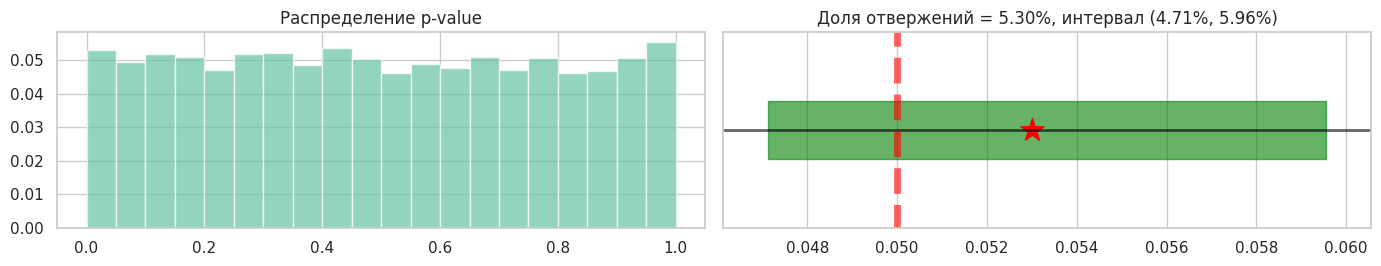

(0.053, (0.047126291449339705, 0.05956003408954137))

In [307]:
strata_weights = strata_weights = calculate_strata_weights(strat_df)

run_experiments(
    test=lambda x, y: stratified_ttest(x, y, strata_weights),
    data=strat_df,
    generate_samples=random_sampler,
    sample_size=int(strat_df.shape[0] / 20),
    n_iter=n_iter,
    draw=True
)

Посмотрим на мощность

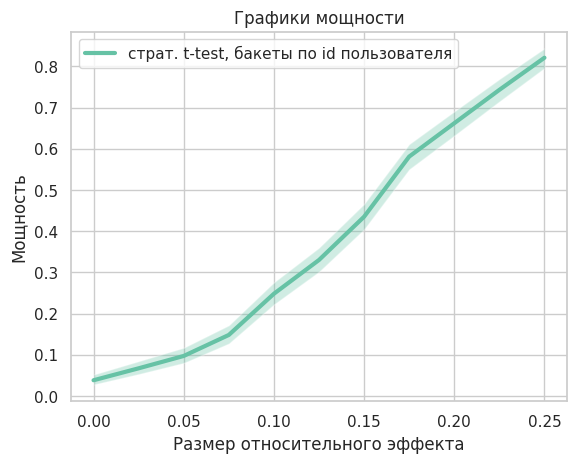

In [308]:
powers7, left_bounds7, right_bounds7 = estimate_power(
    test=lambda x, y: stratified_ttest(x, y, strata_weights, method="post_stratified"),
    data=strat_df,
    generate_samples=random_sampler,
    sample_size=tmp_df.shape[0] // 20,
    n_iter=n_iter_power,
    effects_list=effects_list,
)

draw_power(powers7, left_bounds7, right_bounds7, label="страт. t-test, бакеты по id пользователя")

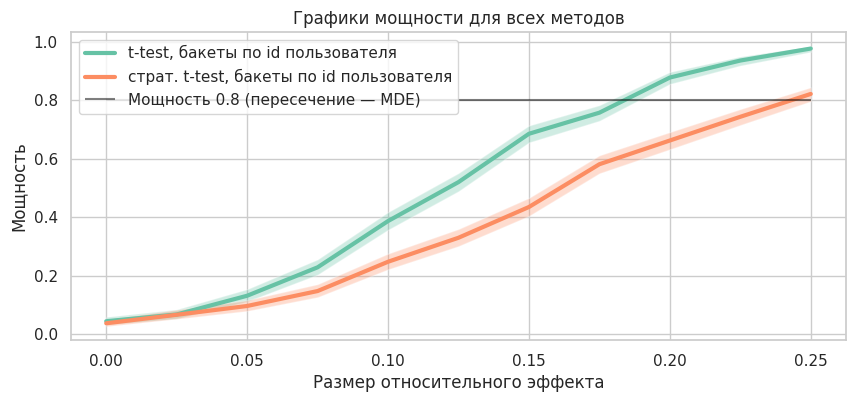

In [309]:
labels = [
    "t-test, бакеты по id пользователя",
    "страт. t-test, бакеты по id пользователя",
]

draw_power(
    [powers6, powers7],
    [left_bounds6, left_bounds7],
    [right_bounds6, right_bounds7],
    effects_list=effects_list,
    label=labels,
    title="Графики мощности для всех методов",
    new_figure=True
)

**Выводы:** Как видим, разделение на бакеты оказалось лучше, чем разделение на бакеты внутри страт. Вероятно это связано с тем, что теперь информация внутри бакетов может пересекаться, а страты перестать быть независимыми. Также вероятно, это связано с тем, что разбиение по стратам не приносит дополнительной информации.

---
### Задача 3.

Для всех критериев из задач AB.4.2 и AB.3.2, которые прошли валидацию по вероятности ошибки I рода, оцените MDE и сравните по нему критерии.

Для большей информативности можно посмотреть код из AB.3, здесь просто приведу код, подсчитывающий мощности и д.и.

Как видим, все избранные критерии подходят.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387353 entries, 0 to 387352
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ym:s:visitID              387353 non-null  float64
 1   ym:s:clientID             387353 non-null  uint64 
 2   ym:s:dateTimeUTC          387353 non-null  object 
 3   ym:s:startURL             387338 non-null  object 
 4   ym:s:endURL               387338 non-null  object 
 5   ym:s:pageViews            387353 non-null  int64  
 6   ym:s:visitDuration        387353 non-null  int64  
 7   ym:s:isNewUser            387353 non-null  int64  
 8   ym:s:bounce               387353 non-null  int64  
 9   ym:s:regionCountry        382478 non-null  object 
 10  ym:s:regionCity           326661 non-null  object 
 11  ym:s:networkType          43035 non-null   object 
 12  ym:s:browserLanguage      327934 non-null  object 
 13  ym:s:browserCountry       224983 non-null  o

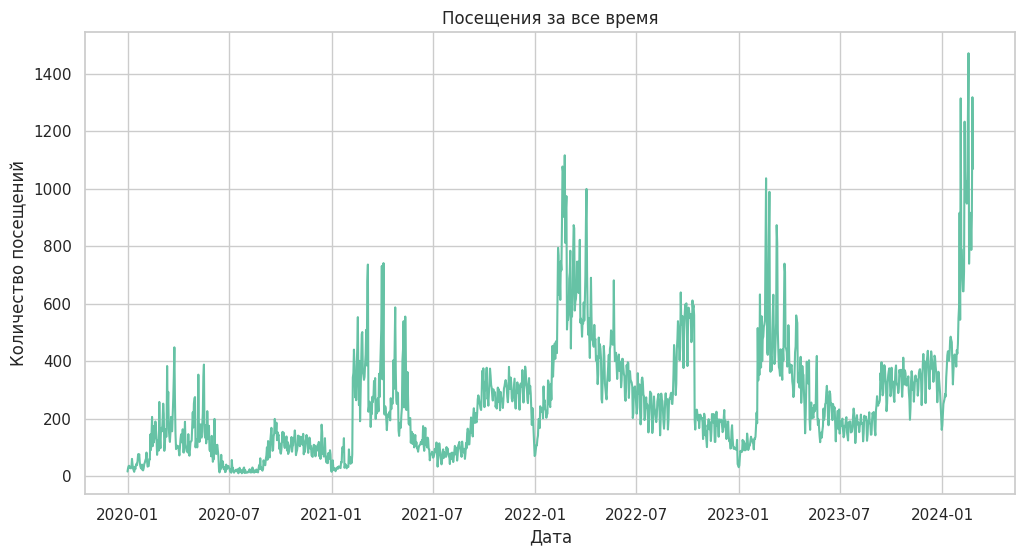

В среднем каждый пользователь совершил 2.02 визитов
Максимальное количество визитов от одного пользователя 584


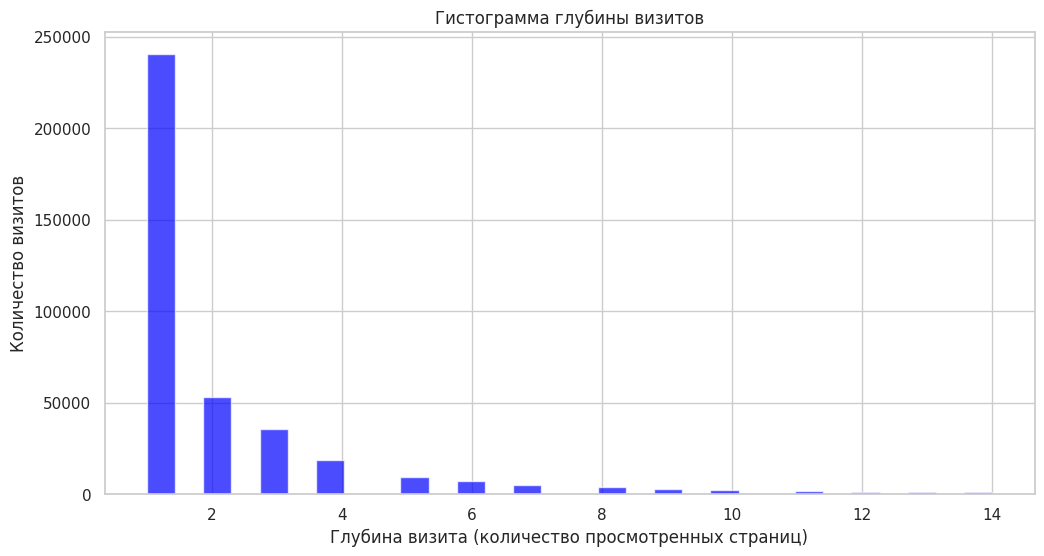

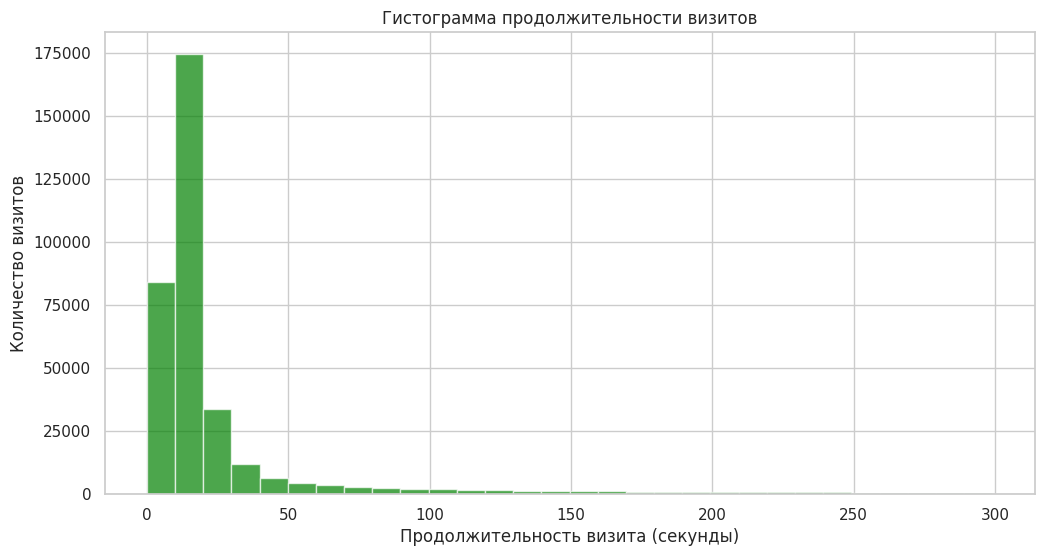

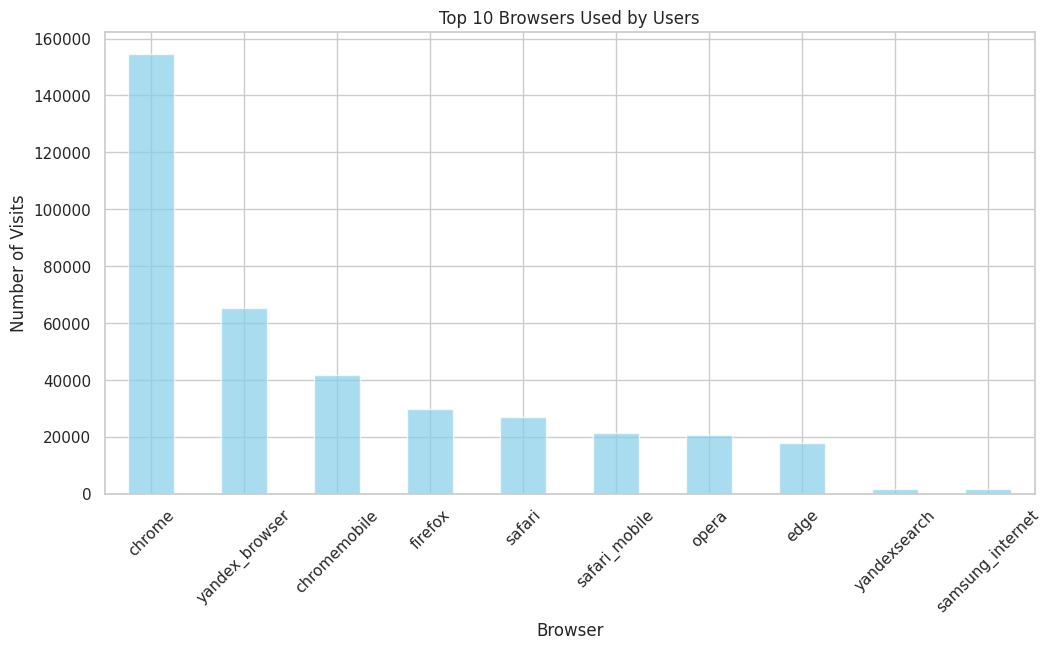

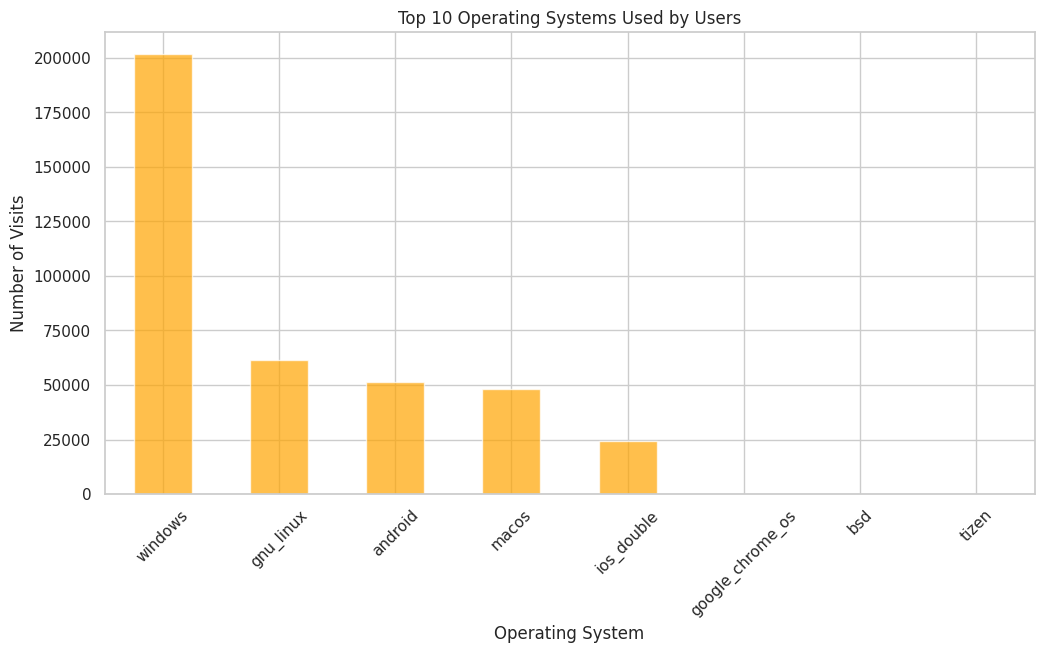

10it [09:02, 54.30s/it]


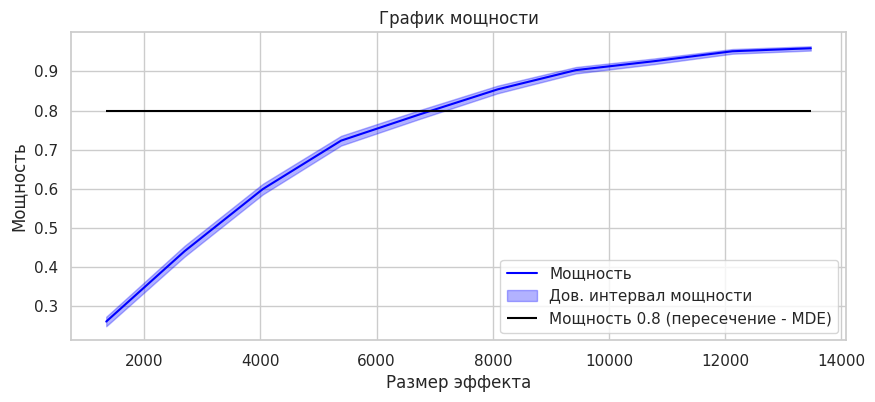

100%|██████████| 5000/5000 [03:54<00:00, 21.36it/s]


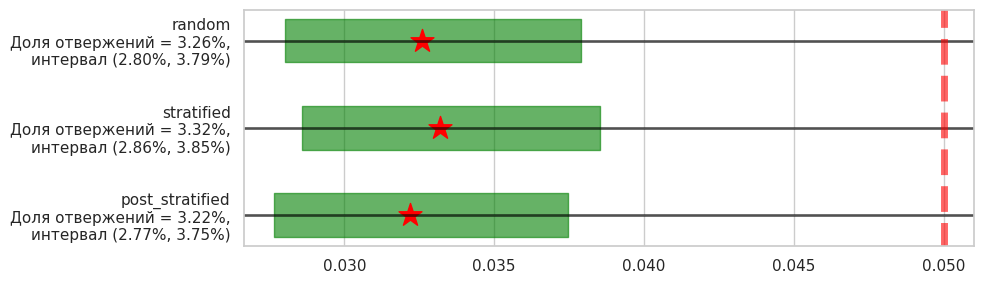

100%|██████████| 1000/1000 [00:17<00:00, 57.75it/s]


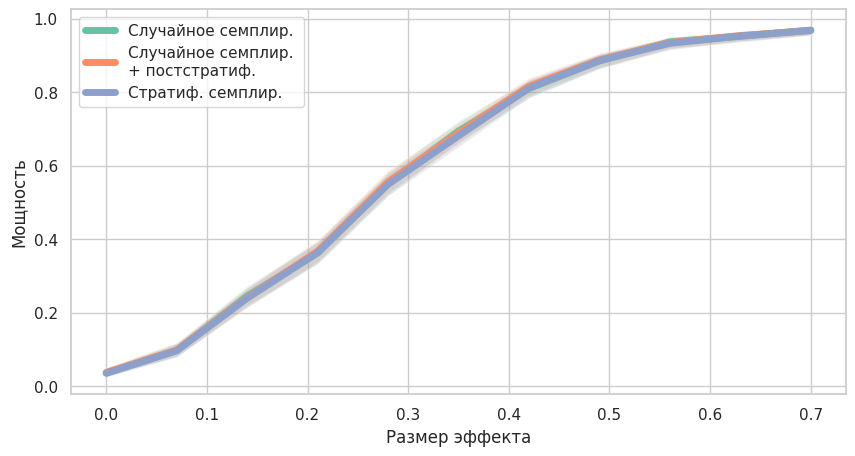

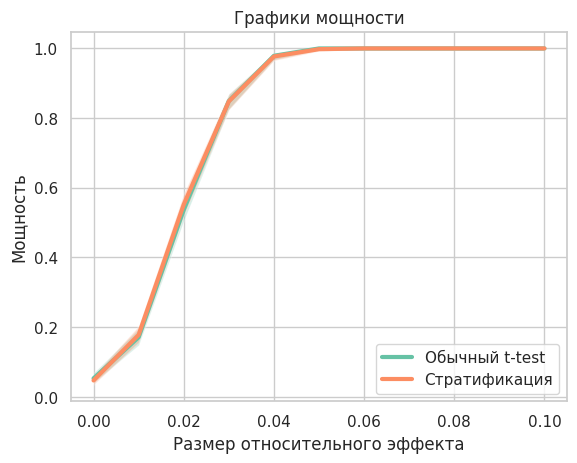

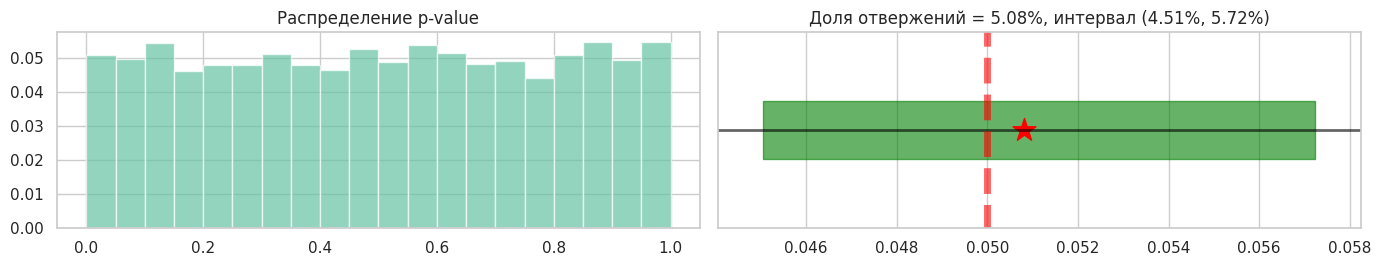

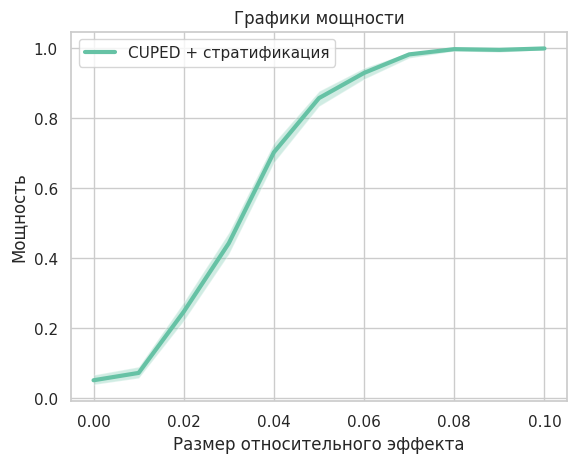

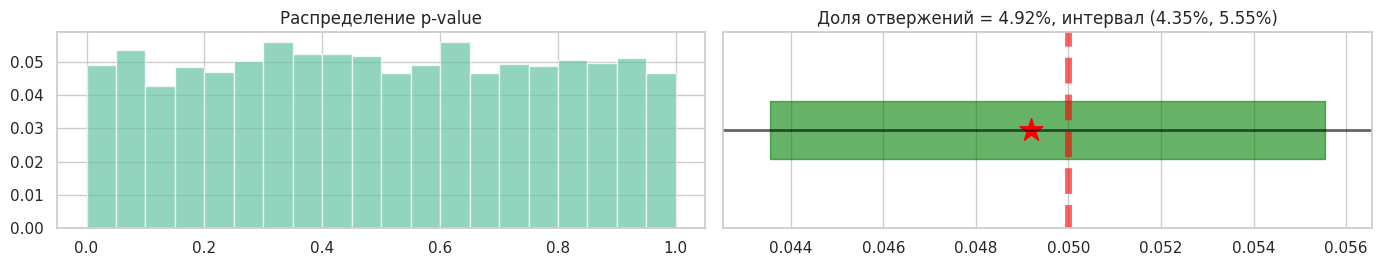

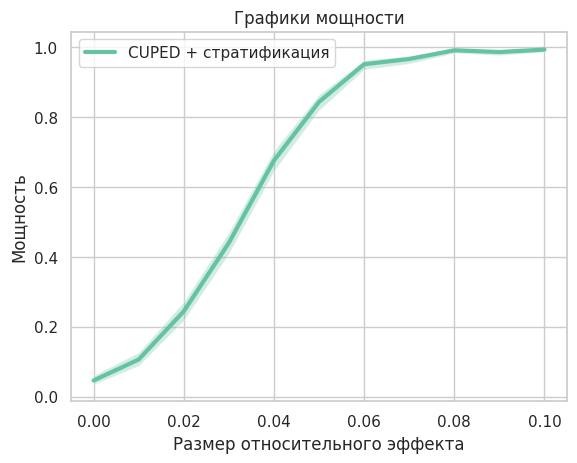

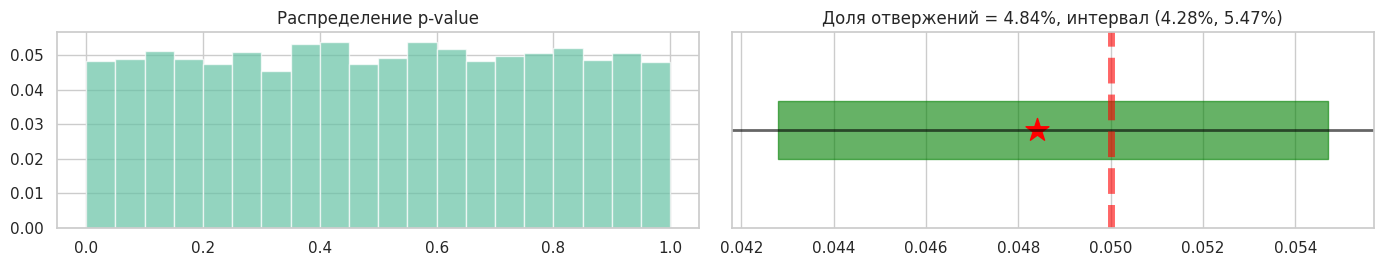

<class 'pandas.core.frame.DataFrame'>
Index: 40027 entries, 247066 to 287101
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample     40027 non-null  int64  
 1   covariate  40027 non-null  float32
dtypes: float32(1), int64(1)
memory usage: 781.8 KB


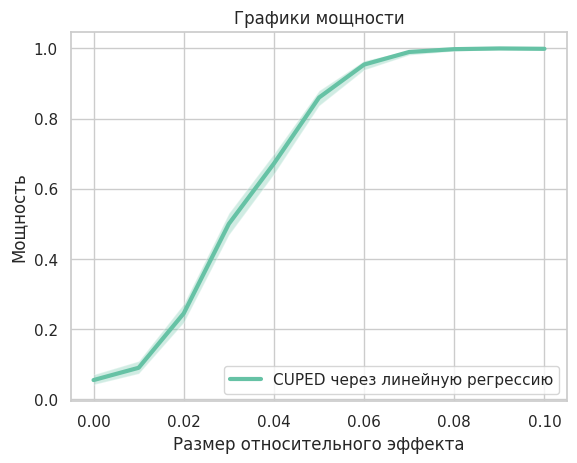

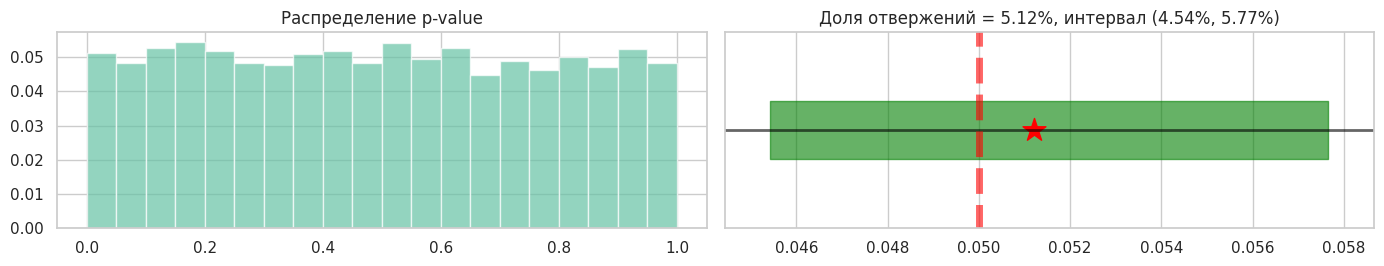

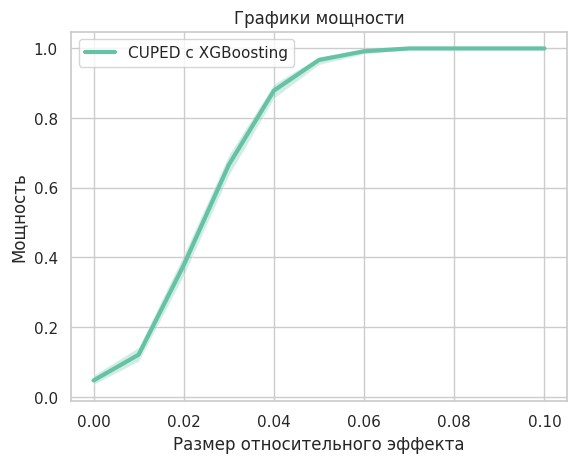

In [372]:
data = pd.read_csv("miptstats_metrica.tsv", sep='\t',)
data.head()
data.info()
data.shape[0]
alpha = 0.05
data["ym:s:dateTimeUTC"] = pd.to_datetime(data["ym:s:dateTimeUTC"])

first_enter = data["ym:s:dateTimeUTC"].min()
last_enter = data["ym:s:dateTimeUTC"].max()

first_enter, last_enter

days = data["ym:s:dateTimeUTC"].dt.date
num_of_visits = data.groupby(days).size()

plt.figure(figsize=(12, 6))
plt.plot(num_of_visits.index, num_of_visits.values)
plt.xlabel('Дата')
plt.ylabel('Количество посещений')
plt.title('Посещения за все время')
plt.grid(True)
plt.show()

data["ym:s:clientID"].nunique()
users = data.groupby("ym:s:clientID").size()
users
users = users.drop(0)
average_visits = users.mean()
max_vists = users.max()

print(f"В среднем каждый пользователь совершил {average_visits:.2f} визитов")
print(f"Максимальное количество визитов от одного пользователя {max_vists}")
data["ym:s:pageViews"].value_counts()
depth = data[data["ym:s:pageViews"] < 15]["ym:s:pageViews"]
# data["ym:s:pageViews"]

plt.figure(figsize=(12, 6))
plt.hist(depth, bins=30, color='blue', alpha=0.7)
plt.xlabel('Глубина визита (количество просмотренных страниц)')
plt.ylabel('Количество визитов')
plt.title('Гистограмма глубины визитов')
plt.grid(True)
plt.show()
duration = data[data["ym:s:visitDuration"] < 300]["ym:s:visitDuration"]

plt.figure(figsize=(12, 6))
plt.hist(duration, bins=30, color='green', alpha=0.7)
plt.xlabel('Продолжительность визита (секунды)')
plt.ylabel('Количество визитов')
plt.title('Гистограмма продолжительности визитов')
plt.grid(True)
plt.show()
data["ym:s:regionCountry"].value_counts()[:10]
top_browsers = data["ym:s:browser"].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_browsers.plot(kind='bar', color='skyblue', alpha=0.7)
plt.xlabel('Browser')
plt.ylabel('Number of Visits')
plt.title('Top 10 Browsers Used by Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
top_os = data["ym:s:operatingSystemRoot"].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_os.plot(kind='bar', color='orange', alpha=0.7)
plt.xlabel('Operating System')
plt.ylabel('Number of Visits')
plt.title('Top 10 Operating Systems Used by Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
experiment_start = pd.Timestamp("2020-02-01")
experiment_end = pd.Timestamp("2023-04-30")

april_df = data[(data["ym:s:dateTimeUTC"] >= experiment_start) & (data["ym:s:dateTimeUTC"] <= experiment_end)]
april_df = april_df[april_df["ym:s:dateTimeUTC"].dt.month.isin([2, 3, 4])]
april_df.head()
april_df.shape[0]
def add_effect(x, effect=0.05):
    """
    Функция искусственного добавления эффекта в тестовую выборку

    Аргументы:
    x -- выборка
    effect -- добавляемый эффект

    Возвращает:
    x -- выборка с добавленным эффектом
    """

    x *= 1 + effect + np.random.uniform(-effect / 5, effect / 5)
    return x

def run_experiments(
    test,
    generate_sample,
    data,
    add_effect=add_effect,
    test_control_proportions=[0],
    n_iter=10000,
    alpha=0.05,
):
    """
    Проведение серии AB-тестов:
        * либо на исторических данных data
        * либо на искусственных данных

    Аргументы:
    test -- статистический критерий
    generate_sample -- функция для семплирования/генерации выборок
    add_effect -- функция для искусственного добавления эффекта в тестовую выборку
    data -- исторические данные, на которых запускаем АА-тест.
        None, если используем искусственные данные
    effect_arr -- массив искусственно добавляемых эффектов
    n_iter -- количество итераций
    alpha -- теоретический уровень значимости

    Возвращает:
    real_alpha -- оценка уровня значимости
    left_alpha, right_alpha -- границы доверительного интервала
    """

    n_rejects = np.zeros(len(test_control_proportions))  # количество отвержений H_0
    size_of_arrs = [
        int(data.shape[0] * proportion) for proportion in test_control_proportions
    ]

    # Проведение экспериментов
    for num_effect, n in tqdm(enumerate(size_of_arrs)):
        for _ in range(n_iter):
            # Генерируем выборки
            x, y = generate_sample(data, n)
            # Добавляем эффект
            x = add_effect(x)
            # Применияем критерий
            n_rejects[num_effect] += test(x, y)[1] < alpha

    # Реальная мощность
    real_power, left_power, right_power = estimate_reject_prob(n_rejects, n_iter)
    # Отрисовка мощности
    draw_power(size_of_arrs, real_power, left_power, right_power)
    return real_power, (left_power, right_power)

def relative_ttest(x, y, alpha=0.05):
    """
    Относительный t-test.

    Аргументы:
    x, y -- выборки одинакового размера
    alpha -- уровень значимости

    Возвращает:
    stat -- статистика критерия
    pvalue
    left_bound, right_bound -- границы дов. интервала
    """

    n = len(x)
    x_mean = x.mean()
    y_mean = y.mean()

    stat = x_mean / y_mean - 1
    var = x.var() / (y_mean**2) + y.var() * (x_mean**2) / (y_mean**4)
    std = np.sqrt(var)

    z_stat = np.sqrt(n) * stat / std
    pvalue = 2 * sps.norm.sf(np.abs(z_stat))

    q = sps.norm.ppf(1 - alpha / 2)
    left_bound = stat - q * std / np.sqrt(n)
    right_bound = stat + q * std / np.sqrt(n)

    return stat, pvalue, (left_bound, right_bound)


def draw_power(effects, real_power, left_power, right_power, title="График мощности"):
    """
    Построение и отрисовка графика мощности критерия.

    Аргументы:
    effects -- сетка эффектов
    real_alpha -- оценка реальной мощности
    left_alpha, right_alpha -- границы соотв. дов. интервала
    title -- заголовок графика
    """

    plt.figure(figsize=(10, 4))
    plt.plot(effects, real_power, color="blue", label="Мощность")
    plt.fill_between(
        effects,
        left_power,
        right_power,
        alpha=0.3,
        color="blue",
        label="Дов. интервал мощности",
    )
    plt.hlines(
        0.8,
        effects[0],
        effects[-1],
        color="black",
        label="Мощность 0.8 (пересечение - MDE)",
    )
    plt.legend()
    plt.xlabel("Размер эффекта")
    plt.ylabel("Мощность")
    plt.title(title)
    plt.show()


def generate_sample_AA_test(data, n=None):
    if n is None:
        n = len(data) // 2
    data = data.sample(frac=1).reset_index(drop=True)

    first_group = data.iloc[:n]
    second_group = data.iloc[n:]

    return first_group, second_group
run_experiments(
    test=sps.ttest_ind,
    generate_sample=generate_sample_AA_test,
    data=april_df["ym:s:pageViews"],
    n_iter=n_iter, 
    alpha=alpha,
    test_control_proportions=np.linspace(0.01, 0.1, 10)
);
def AA_test(
    test, generate_sample, data=None, n_iter=10000, alpha=0.05, show_pvals=False
):
    """
    Проведение серии AA-тестов:
        * либо на исторических данных data
        * либо на искусственных данных

    Аргументы:
    test -- статистический критерий
    generate_sample -- функция для семплирования/генерации выборок
    data -- исторические данные, на которых запускаем АА-тест.
        None, если используем искусственные данные
    n_iter -- количество итераций
    alpha -- теоретический уровень значимости
    show_pvals -- показывать ли распределение p-value

    Возвращает:
    type_1_prob_est -- оценка вероятности ошибки первого рода
    left_bound, right_bound -- границы доверительного интервала
    """

    n_rejects = 0  # количество отвержений H_0
    pvals = []

    # Проведение экспериментов
    for _ in tqdm(range(n_iter)):
        # Генерируем выборки
        x, y = generate_sample(data)
        # Применияем критерий
        pvals.append(test(x, y)[1])
        n_rejects += pvals[-1] < alpha

    # Оценка вероятности ошибки первого рода
    type_1_prob_est, left_bound, right_bound = estimate_reject_prob(n_rejects, n_iter)

    # Визуализация
    figsize = (14, 3) if show_pvals else (5, 2)
    visualization(
        type_1_prob_est, left_bound, right_bound, show_pvals, pvals, alpha, figsize
    )
    return type_1_prob_est, (left_bound, right_bound)


def visualization(
    prob_reject,
    left_bound,
    right_bound,
    show_pvals=False,
    pvals=None,
    alpha=0.05,
    figsize=(7, 2),
):
    """
    Отрисовка интервала для вероятности отвержения критерия
    и гистограммы p-value (опционально)
    prob_reject -- оценка вероятности отвержения
    left_bound, right_bound -- границы доверительного интервала
    alpha -- теоретический уровень значимости
    show_pvals -- показывать ли распределение p-value
    pvals -- массив из p-value
    figsize -- размер фигуры matplotlib
    """

    # построение гистограммы p-value (опционально)
    if show_pvals:
        with sns.axes_style("darkgrid"):
            plt.figure(figsize=figsize)
            plt.subplot(1, 2, 1)
            plt.hist(
                pvals,
                bins=np.linspace(0, 1, 21),
                color="blue",
                alpha=0.4,
                weights=np.ones(len(pvals)) / len(pvals),
            )
            plt.title("Распределение p-value")

    # отрисовка интервала для вероятности отвержения критерия
    with sns.axes_style("whitegrid"):
        if show_pvals:
            plt.subplot(1, 2, 2)
        else:
            plt.figure(figsize=figsize)
        plt.hlines(0, 0, 1, color="black", lw=2, alpha=0.6)
        plt.vlines(alpha, -1, 1, color="red", lw=5, linestyle="--", alpha=0.6)
        plt.fill_between(
            [left_bound, right_bound], [0.15] * 2, [-0.15] * 2, color="green", alpha=0.6
        )
        plt.scatter(prob_reject, 0, s=300, marker="*", color="red")
        plt.xlim((min(alpha, left_bound) - 1e-3, max(alpha, right_bound) + 1e-3))
        plt.title(
            f"Доля отвержений = {100*prob_reject:.2f}%, "
            f"интервал ({100*left_bound:.2f}%, {100*right_bound:.2f}%)"
        )
        plt.ylim((-0.5, 0.5))
        plt.yticks([])
        plt.tight_layout()
        plt.show()


def estimate_reject_prob(n_rejects, n_iter):
    """
    Оценка вероятности отвержения критерия и ее дов. интервала.
    Используется для оценки вероятности ошибки первого рода и мощности

    Аргументы:
    n_rejects -- количество отвержений H_0 в эксперименте
    n_iter -- количество экспериментов

    Возвращает:
    prob_reject -- оценка вероятности отвержения критерия
    left_bound, right_bound -- границы соотв. дов. интервала
    """

    prob_reject = n_rejects / n_iter
    left_bound, right_bound = proportion_confint(n_rejects, n_iter, method="wilson")

    return prob_reject, left_bound, right_bound


def relative_ttest(x, y, alpha=0.05):
    '''
    Относительный t-test.
    
    Аргументы:
    x, y -- выборки одинакового размера
    alpha -- уровень значимости
    
    Возвращает:
    stat -- статистика критерия
    pvalue
    left_bound, right_bound -- границы дов. интервала
    '''
    
    n = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    stat = x_mean/y_mean - 1
    var = x.var() / (y_mean**2) \
            + y.var() * (x_mean**2) / (y_mean**4)
    std = np.sqrt(var)
    
    z_stat = np.sqrt(n) * stat / std
    pvalue = 2*sps.norm.sf(np.abs(z_stat))
    
    q = sps.norm.ppf(1 - alpha/2)
    left_bound = stat - q*std/np.sqrt(n)
    right_bound = stat + q*std/np.sqrt(n)
    
    return stat, pvalue, left_bound, right_bound

def run_experiments(test, generate_sample, add_effect, data=None, effects=[0],
            n_iter=10000, alpha=0.05):    
    '''
    Проведение серии AB-тестов:
        * либо на исторических данных data
        * либо на искусственных данных
   
    Аргументы:
    test -- статистический критерий
    generate_sample -- функция для семплирования/генерации выборок
    add_effect -- функция для искусственного добавления эффекта в тестовую выборку
    data -- исторические данные, на которых запускаем АА-тест. 
        None, если используем искусственные данные
    effect_arr -- массив искусственно добавляемых эффектов
    n_iter -- количество итераций
    alpha -- теоретический уровень значимости

    Возвращает:
    real_alpha -- оценка уровня значимости
    left_alpha, right_alpha -- границы доверительного интервала
    '''

    n_rejects = np.zeros(len(effects))  # количество отвержений H_0

    # Проведение экспериментов
    for num_effect, effect in tqdm(enumerate(effects)):
        for _ in tqdm(range(n_iter)):
            # Генерируем выборки
            x, y = generate_sample(data)
            # Добавляем эффект
            x = add_effect(x, effect)    
            # Применияем критерий
            n_rejects[num_effect] += (test(x, y)[1] < alpha)

    # Реальная мощность
    real_power, left_power, right_power = estimate_reject_prob(n_rejects, n_iter)
    # Отрисовка мощности
    draw_power(effects, real_power, left_power, right_power)
    return real_power, (left_power, right_power)


def add_effect(x, effect=0.05):
    """
    Функция искусственного добавления эффекта в тестовую выборку

    Аргументы:
    x -- выборка
    effect -- добавляемый эффект

    Возвращает:
    x -- выборка с добавленным эффектом
    """

    x *= 1 + effect + np.random.uniform(-effect / 5, effect / 5)
    return x

def draw_power(effects, real_power, left_power, right_power, title='График мощности'):
    '''
    Построение и отрисовка графика мощности критерия.
   
    Аргументы:
    effects -- сетка эффектов
    real_alpha -- оценка реальной мощности
    left_alpha, right_alpha -- границы соотв. дов. интервала
    title -- заголовок графика
    '''

    plt.figure(figsize=(10, 4))
    plt.plot(effects, real_power, color='blue', label='Мощность')
    plt.fill_between(effects, left_power, right_power, alpha=0.3, color='blue', 
                     label='Дов. интервал мощности')
    plt.hlines(0.8, effects[0], effects[-1], color='black',
               label='Мощность 0.8 (пересечение - MDE)')
    plt.legend()
    plt.xlabel('Размер эффекта')
    plt.ylabel('Мощность')
    plt.title(title)
    plt.show()
def generate_sample_by_start_day(data, n=None):
    if n is None:
        n = len(data) // 2

    FORBIDDEN_DATE = pd.Timestamp("2024-01-01")
    start_date = data["ym:s:dateTimeUTC"].min()
    delta_days = (FORBIDDEN_DATE - start_date).days
    start_date = start_date + pd.Timedelta(days= np.random.randint(0, delta_days))
    data = data.sample(frac=1).reset_index(drop=True)

    first_group = data[data["ym:s:dateTimeUTC"] > start_date]["ym:s:pageViews"].iloc[:n]
    second_group = data[data["ym:s:dateTimeUTC"] > start_date]["ym:s:pageViews"].iloc[n:]

    return first_group, second_group

def random_sampler(data, sample_size):
    '''
    Случайное семплирование двух групп одного размера из данных.

    :param data: исходные данные
    :param sample_size: размер группы
    :return: две группы данных
    '''

    choiced = data.sample(n=2 * sample_size)
    return choiced.iloc[:sample_size], choiced.iloc[-sample_size:]


def sample_mean_diff(data, sample_size, n_iter):
    '''
    Реализация итераций семплирования двух случайных групп и вычисления разности средних.

    :param data: исходные данные
    :param sample_size: размер группы
    :param n_iter: количество итераций семплирования
    :return: выборка разности средних
    '''

    mean_sample = np.zeros(n_iter)

    for i in tqdm(range(n_iter)):
        groups = random_sampler(data, sample_size)
        mean_sample[i] = groups[0]['sample'].mean() - groups[1]['sample'].mean()

    return mean_sample

def calculate_strata_weights(data):
    '''
    Вычисляет веса страт.
    
    :param data: исходные данные
    :return: веса страт
    '''
    
    strata_weights = data.groupby(by='strata')['sample'].count()
    strata_weights = strata_weights / strata_weights.sum()
    return strata_weights

def weighted_mean(data, weights):
    '''
    Вычисляет взвешенное среднее.

    :param data: данные
    :param weights: веса страт
    :return: взвешенное среднее
    '''

    strata_means = data.groupby(by='strata')['sample'].mean()
    return (strata_means * weights).sum()


def simple_mean(data, weights):
    '''
    Вычисляет обычное выборочное среднее

    :param data: данные
    :param weights: не используется, нужен для совместимости
    :return: выборочное среднее
    '''

    return data['sample'].mean()


def stratified_sampler(data, sample_size):
    '''
    Стратифицированное семплирование выборок.

    :param data: данные
    :param sample_size: размер выборки
    :return: две выборки
    '''

    # Веса страт
    strata_weights = calculate_strata_weights(data)

    # Размер выборок
    strata_sample_size = np.floor(sample_size * strata_weights + 0.5).astype(int)

    a_group, b_group = [], []
    # Генерируем для каждой страты отдельно
    for i, strata in enumerate(data.groupby(by='strata')):
        a, b = random_sampler(strata[1], strata_sample_size[i])
        a_group.append(a)
        b_group.append(b)

    return pd.concat(a_group), pd.concat(b_group)


def sample_mean_diff(sampler, mean_function, data, sample_size, n_iter):
    '''
    Реализация итераций семплирования двух групп и вычисления разности средних.

    :param sampler: функция семплирования двух групп
    :param mean_function: функция вычисления среднего
    :param data: исходные данные
    :param sample_size: размер группы
    :param n_iter: количество итераций семплирования
    :return: выборка разности средних
    '''

    # Веса страт
    strata_weights = calculate_strata_weights(data)

    mean_sample = np.zeros(n_iter)

    for i in tqdm(range(n_iter)):
        # Семплирование
        groups = sampler(data, sample_size)
        # Вычисление разности средних
        mean_sample[i] = mean_function(groups[0], strata_weights) - mean_function(groups[1], strata_weights)

    return mean_sample

def weighted_var(data, strata_weights):
    '''
    Вычисляет взвешенную дисперсию при стратификации.
    
    :param data: данные
    :param strata_weights: веса страт
    :return: дисперсия
    '''
    
    strata_vars = data.groupby(by='strata')['sample'].var()
    return (strata_vars * strata_weights).sum() / len(data)


def weighted_post_var(data, strata_weights):
    '''
    Вычисляет взвешенную дисперсию при постстратификации.
    
    :param data: данные
    :param strata_weights: веса страт
    :return: дисперсия
    '''
    
    strata_vars = data.groupby(by='strata')['sample'].var()
    weighted_var = (strata_vars * strata_weights).sum() / len(data)
    post_addition = (strata_vars * (1-strata_weights)).sum() / (len(data)**2)
    return weighted_var + post_addition


def simple_var(data, strata_weights):
    '''
    Вычисляет обычную дисперсию при случайном семплировании.

    :param data: данные
    :param strata_weights: веса страт, не используется, нужен для совместимости
    :return: дисперсия
    '''

    return data['sample'].var() / len(data)

def stratified_ttest(x_data, y_data, strata_weights, method='random', alpha=0.05):
    '''
    Стратифицированный абсолютный t-test.
    
    :param x_data: выборка вместе с информацией о стратах
    :param y_data: выборка вместе с информацией о стратах
    :param strata_weights: веса страт
    :param method: метод 'random', 'stratified', 'post_stratified'
    :param alpha: уровень значимости
    :return: статистика критерия, границы доверительного интервала, p-value
    '''
    
    if method == 'random':
        mean_function = simple_mean
        var_function = simple_var
    elif method == 'stratified':
        mean_function = weighted_mean
        var_function = weighted_var
    elif method == 'post_stratified':
        mean_function = weighted_mean
        var_function = weighted_post_var
        
    x_mean = mean_function(x_data, strata_weights)
    y_mean = mean_function(y_data, strata_weights)
    x_var  =  var_function(x_data, strata_weights)
    y_var  =  var_function(y_data, strata_weights)
    
    stat = x_mean - y_mean
    std = np.sqrt(x_var + y_var)
    
    t_stat = stat / std
    pvalue = 2*sps.norm.sf(np.abs(t_stat))
    
    q = sps.norm.ppf(1 - alpha/2)
    left_bound = stat - q*std
    right_bound = stat + q*std
    
    return stat, pvalue, left_bound, right_bound

def draw_interval(
    real_alpha, left_alpha, right_alpha, methods,
    alpha=0.05, figsize=(7, 2)
):
    '''
    Отрисовка интервала для реального уровня значимости
    real_alpha -- оценка уровня значимости
    left_alpha, right_alpha -- границы доверительного интервала
    methods --- список методов
    alpha -- теоретический уровень значимости
    figsize -- размер фигуры matplotlib
    '''
    
    texts = []
    
    with sns.axes_style("whitegrid"):
        plt.figure(figsize=(10, 3))
        
        for i in range(len(methods)):
            plt.hlines(-i, 0, 1, color='black', lw=2, alpha=0.6)
            plt.fill_between(
                [left_alpha[i], right_alpha[i]], [-i-0.25]*2, [-i+0.25]*2,
                color='green', alpha=0.6
            )
            plt.scatter(real_alpha[i], -i, s=300, marker='*', color='red')
            plt.xlim((min(alpha, left_alpha.min())-1e-3, max(alpha, right_alpha.max())+1e-3))
            texts.append(
                f'{methods[i]}\n'
                f'Доля отвержений = {100*real_alpha[i]:.2f}%,\n'
                f'интервал ({100*left_alpha[i]:.2f}%, {100*right_alpha[i]:.2f}%)'
            )
        plt.ylim((-len(methods)+0.65, 0.35))
        
        plt.vlines(alpha, -len(methods), 1, color='red', lw=5, linestyle='--', alpha=0.6)
        plt.yticks(-np.arange(len(methods)), texts)
        plt.tight_layout()
        plt.show()
        
def estimate_reject_prob(n_rejects, n_iter):
    '''
    Оценка вероятности отвержения критерия и ее дов. интервала.
    Используется для оценки вероятности ошибки первого рода и мощности
   
    Аргументы:
    n_rejects -- количество отвержений H_0 в эксперименте
    n_iter -- количество экспериментов
   
    Возвращает:
    prob_reject -- оценка вероятности отвержения критерия
    left_bound, right_bound -- границы соотв. дов. интервала
    '''
   
    prob_reject = n_rejects / n_iter
    left_bound, right_bound = proportion_confint(n_rejects, n_iter, method='wilson')
   
    return prob_reject, left_bound, right_bound

def run_experiments(
    data, strata_weights, sampler,
    methods=['random', 'stratified', 'post_stratified'],
    n_iter=10000, sample_size=200, alpha=0.05, effect=0, show=True
):
    '''
    Проведение серии AA-тестов на  выборках.
    
    Аргументы:
    generate_data -- функция для семплирования исходных данных
    sampler -- функция для семплирования групп
    total_size -- общий размер данных
    methods -- список методов из 'random', 'stratified', 'post_stratified'
    n_iter -- количество итераций
    sample_size -- размер выборок
    alpha -- теоретический уровень значимости
    effect -- величина эффекта
    show -- строить ли график
    '''

    n_rejects = np.zeros(len(methods))  # количество отвержений H_0

    # Проведение экспериментов
    for _ in tqdm(range(n_iter)):
        # Генерируем две группы
        x, y = sampler(data, sample_size)
        
        # Добавляем эффект, если хотим оценить мощность
        y['sample'] *= (1 + effect)
        
        # Применяем критерии
        for i in range(len(methods)):
            n_rejects[i] += stratified_ttest(x, y, strata_weights, method=methods[i])[-1] < alpha

    # Вероятность отвержения
    prob_reject = np.zeros((len(methods), 3))
    for i in range(len(methods)):
        prob_reject[i] = estimate_reject_prob(n_rejects[i], n_iter)

    if show:
        draw_interval(
            prob_reject[:, 0], prob_reject[:, 1], prob_reject[:, 2], 
            methods, alpha=alpha
        )
        
    return prob_reject
1.

os = april_df["ym:s:operatingSystemRoot"].unique()

os = [x for x in os if x not in ['bsd', 'nan', 'google_chrome_os', 'tizen', np.nan]]
os
strat_df = april_df[april_df["ym:s:operatingSystemRoot"].isin(os)]

strat_df["strata"] = april_df["ym:s:operatingSystemRoot"]
strat_df = strat_df[["strata", "ym:s:pageViews"]]
strat_df.rename(columns={"ym:s:pageViews": "sample"}, inplace=True)
strat_df.head()
strata_weights = calculate_strata_weights(strat_df)
strata_weights
run_experiments(
    data=strat_df,
    strata_weights=strata_weights,
    sampler=stratified_sampler,
    n_iter=n_iter, 
)
effects_list = np.linspace(0, 0.7, 11)
prob_reject = np.zeros((len(effects_list), 3, 3))

for i, effect in enumerate(effects_list):
    prob_reject[i] = run_experiments(
        data=strat_df,
        strata_weights=strata_weights,
        sampler=random_sampler, 
        n_iter=n_iter_power, 
        effect=effect,
        show=False, 
    )
plt.figure(figsize=(10, 5))

labels = [
    'Случайное семплир.',
    'Случайное семплир. \n+ постстратиф.',
    'Стратиф. семплир.',
]

for i in range(3):
    plt.plot(effects_list, prob_reject[:, i, 0], lw=5, label=labels[i])
    plt.fill_between(effects_list, prob_reject[:, i, 1], prob_reject[:, i, 2], alpha=0.2)
plt.xlabel('Размер эффекта')
plt.ylabel('Мощность')
plt.legend()
plt.show()
def estimate_reject_prob(n_rejects, n_iter):
    """
    Оценка вероятности отвержения критерия и ее дов. интервала.
    Используется для оценки вероятности ошибки первого рода и мощности

    Аргументы:
    n_rejects -- количество отвержений H_0 в эксперименте
    n_iter -- количество экспериментов

    Возвращает:
    prob_reject -- оценка вероятности отвержения критерия
    left_bound, right_bound -- границы соотв. дов. интервала
    """

    prob_reject = n_rejects / n_iter
    left_bound, right_bound = proportion_confint(n_rejects, n_iter, method="wilson")

    return prob_reject, left_bound, right_bound


def visualization(
    prob_reject,
    left_bound,
    right_bound,
    show_pvals=False,
    pvals=None,
    alpha=0.05,
    figsize=(7, 2),
    title=None,
):
    """
    Отрисовка интервала для вероятности отвержения критерия
    и гистограммы p-value (опционально)
    prob_reject -- оценка вероятности отвержения
    left_bound, right_bound -- границы доверительного интервала
    alpha -- теор вероятность ошибки первого рода
    show_pvals -- показывать ли распределение p-value
    pvals -- массив из p-value
    figsize -- размер фигуры matplotlib
    """

    # построение гистограммы p-value (опционально)
    if show_pvals:
        with sns.axes_style("whitegrid"):
            plt.figure(figsize=figsize)
            plt.subplot(1, 2, 1)
            plt.hist(
                pvals,
                bins=np.linspace(0, 1, 21),
                alpha=0.7,
                weights=np.ones(len(pvals)) / len(pvals),
            )
            plt.title("Распределение p-value")

    # отрисовка интервала для вероятности отвержения критерия
    with sns.axes_style("whitegrid"):
        if show_pvals:
            plt.subplot(1, 2, 2)
        else:
            plt.figure(figsize=figsize)
        plt.hlines(0, 0, 1, color="black", lw=2, alpha=0.6)
        plt.vlines(alpha, -1, 1, color="red", lw=5, linestyle="--", alpha=0.6)
        plt.fill_between(
            [left_bound, right_bound], [0.15] * 2, [-0.15] * 2, color="green", alpha=0.6
        )
        plt.scatter(prob_reject, 0, s=300, marker="*", color="red")
        plt.xlim((min(alpha, left_bound) - 1e-3, max(alpha, right_bound) + 1e-3))
        plt.title(
            f"Доля отвержений = {100*prob_reject:.2f}%, "
            f"интервал ({100*left_bound:.2f}%, {100*right_bound:.2f}%)"
        )
        plt.suptitle(title)
        plt.ylim((-0.5, 0.5))
        plt.yticks([])
        plt.tight_layout()
        plt.show()


def draw_power(
    powers,
    left_powers,
    right_powers,
    effects_list=np.linspace(0, 0.1, 11),
    label=None,
    title="Графики мощности",
    new_figure=False,
):
    """
    Построение и отрисовка графика мощности критерия.

    Аргументы:
    powers -- оценка мощности (массив или список массивов/объектов)
    left_powers, right_powers -- границы соотв. доверительного интервала (массив или список)
    effects_list -- сетка эффектов
    label -- подпись графика (строка или список строк)
    title -- заголовок графика
    new_figure -- создавать новую фигуру или нет
    """

    if new_figure:
        plt.figure(figsize=(10, 4))

    # Преобразуем одиночные массивы в списки, если передали только один набор данных
    if not isinstance(powers, (list, tuple)):
        powers = [powers]
        left_powers = [left_powers]
        right_powers = [right_powers]
        label = [label] if label else [None]

    # Рисуем все переданные графики мощности
    for i, (p, lp, rp) in enumerate(zip(powers, left_powers, right_powers)):
        # Если передан объект, извлекаем из него нужные атрибуты
        if hasattr(p, "powers"):
            lp, rp = p.left_powers, p.right_powers
            p = p.powers

        plt.plot(effects_list, p, label=label[i] if label else None, lw=3)
        plt.fill_between(effects_list, lp, rp, alpha=0.3)

    if new_figure:
        plt.hlines(
            0.8,
            effects_list[0],
            effects_list[-1],
            color="black",
            alpha=0.5,
            label="Мощность 0.8 (пересечение — MDE)",
        )

    plt.legend()
    plt.xlabel("Размер относительного эффекта")
    plt.ylabel("Мощность")
    plt.title(title)


def add_effect(x, effect, target_name="pilot", relative_effect=True):
    """
    Функция искусственного добавления эффекта в тестовую выборку

    Аргументы:
    x -- выборка
    effect -- добавляемый эффект
    target_name -- имя столбца с целевой метрикой
    relative_effect -- является ли эффект относительным или абсолютным

    Возвращает:
    x -- выборка с добавленным эффектом
    """

    x_copy = x.copy()
    if relative_effect:
        x_copy[target_name] *= 1 + effect
    else:
        x_copy[target_name] += effect

    return x_copy


def run_experiments(
    test,
    data,
    generate_samples,
    n_iter=10000,
    sample_size=1000,
    effect=0,
    relative_effect=True,
    alpha=0.05,
    target_name="sample",
    draw=False,
    title=None,
    show_pvals=True,
):
    """
    Проведение серии AA-тестов на искусственных выборках.

    Аргументы:
    test -- статистический критерий
    generate_samples -- функции для семплирования выборок
    n_iter -- количество итераций
    sample_size -- размер выборок
    effect -- размер добавляемого эффекта (для оценки мощности)
    relative_effect -- является ли эффект относительным или абсолютным
    alpha -- теор вероятность ошибки первого рода
    target_name -- имя столбца с целевой метрикой
    """

    n_rejects = 0  # количество отвержений H_0
    pvals = []  # значения p-value
    # Проведение экспериментов
    for _ in tqdm(range(n_iter), leave=False):
        # Генерируем выборки
        x_data, y_data = generate_samples(data, sample_size=sample_size)

        # Добавляем эффект, если хотим оценить мощность
        x_data = add_effect(
            x_data, effect, target_name=target_name, relative_effect=relative_effect
        )

        # Применяем критерий
        pvals.append(test(x_data, y_data)[1])
        n_rejects += pvals[-1] < alpha

    # Оценка вероятности отвержения
    prob_reject, left_bound, right_bound = estimate_reject_prob(n_rejects, n_iter)

    # Визуализация
    if draw:
        figsize = (14, 3) if show_pvals else (5, 2)
        visualization(
            prob_reject,
            left_bound,
            right_bound,
            show_pvals,
            pvals,
            alpha,
            figsize,
            title,
        )

    return prob_reject, (left_bound, right_bound)


def estimate_power(
    test,
    data,
    generate_samples,
    n_iter=10000,
    sample_size=1000,
    effects_list=np.linspace(0, 0.25, 11),
    relative_effect=True,
    alpha=0.05,
    target_name="sample",
):
    """
    Проведение серии тестов на искусственных выборках для оценки мощности.

    Аргументы:
    test -- статистический критерий
    generate_samples -- функции для семплирования выборок
    n_iter -- количество итераций
    sample_size -- размер выборок
    effects_list -- список добавляемых эффектов
    relative_effect -- является ли эффект относительным или абсолютным
    alpha -- теор вероятность ошибки первого рода
    target_name -- имя столбца с целевой метрикой
    """

    powers = np.zeros(len(effects_list))
    left_bounds = np.zeros(len(effects_list))
    right_bounds = np.zeros(len(effects_list))

    for i, effect in tqdm(enumerate(effects_list), leave=False):
        powers[i], (left_bounds[i], right_bounds[i]) = run_experiments(
            test,
            data,
            generate_samples,
            n_iter=n_iter,
            sample_size=sample_size,
            effect=effect,
            relative_effect=relative_effect,
            alpha=alpha,
            target_name=target_name,
            draw=False,
        )

    return powers, left_bounds, right_bounds
effects_list = np.linspace(0, 0.25, 11)

powers0, left_bounds0, right_bounds0 = estimate_power(
    test=sps.ttest_ind,
    data=strat_df.drop(columns=["strata"]),
    generate_samples=random_sampler,
    sample_size=int(strat_df.shape[0] / 20),
    n_iter=n_iter_power,
    effects_list=effects_list,
)

draw_power(powers0, left_bounds0, right_bounds0, label="Обычный t-test")
effects_list = np.linspace(0, 0.25, 11)

powers1, left_bounds1, right_bounds1 = estimate_power(
    test=lambda x, y: stratified_ttest(x, y, strata_weights),
    data=strat_df,
    generate_samples=stratified_sampler,
    sample_size=int(strat_df.shape[0] / 20),
    n_iter=n_iter_power,
    effects_list=effects_list,
)

draw_power(powers1, left_bounds1, right_bounds1, label="Cтратификация")
end_of_pre_period = pd.Timestamp("2023-01-01")
data_before = april_df[april_df["ym:s:dateTimeUTC"] < end_of_pre_period]
data_after = april_df[april_df["ym:s:dateTimeUTC"] >= end_of_pre_period]

users_before_period = data_before.groupby("ym:s:clientID")["ym:s:pageViews"].mean()
users_before_period
UNKNOWN_PAGE_VIEW = users_before_period.mean()
data_after["covariate"] = (
    data_after["ym:s:clientID"].map(users_before_period).fillna(UNKNOWN_PAGE_VIEW)
)

data_after["covariate"].value_counts()
data_after[data_after["covariate"] != UNKNOWN_PAGE_VIEW].shape[0]
data_after["strata"] = (data_after["covariate"] != UNKNOWN_PAGE_VIEW).apply(int)
data_after = data_after[["ym:s:pageViews", "covariate", "strata"]]
data_after.rename(columns={"ym:s:pageViews" : "sample"}, inplace=True)
data_after.head()
strata_weights = calculate_strata_weights(data_after)
strata_weights
def stratified_cuped_transform(
    x_data,
    y_data,
    target_name="sample",
    covariate_name="covariate",
    strata_name="strata",
    return_theta=False,
):
    """
    Выполняет CUPED-преобразование с учетом страт.

    :param x_data: данные тестовой группы (DataFrame)
    :param y_data: данные контрольной группы (DataFrame)
    :param target_name: имя столбца с целевой метрикой
    :param covariate_name: имя столбца-ковариаты
    :param strata_name: имя столбца со стратами
    :param return_theta: возвращать ли словарь значений theta по стратам
    :return: обновленные x_data и y_data с добавленным столбцом "cuped", а также theta_s (если return_theta=True)
    """
    x_data = x_data.copy()
    y_data = y_data.copy()
    theta_s = {}

    # Обрабатываем все страты из обеих групп
    strata = set(x_data[strata_name].unique()).union(set(y_data[strata_name].unique()))

    for stratum in strata:
        x_stratum = x_data[x_data[strata_name] == stratum]
        y_stratum = y_data[y_data[strata_name] == stratum]

        # Вычисляем theta на контрольной группе
        if len(y_stratum) > 1:
            cov_y = np.cov(y_stratum[target_name], y_stratum[covariate_name], ddof=0)[
                0, 1
            ]
            var_y = np.var(y_stratum[covariate_name], ddof=0)
            theta = cov_y / var_y if var_y != 0 else 0
        else:
            theta = 0

        theta_s[stratum] = theta

        # Среднее ковариаты в контрольной группе
        covariate_mean = y_stratum[covariate_name].mean() if not y_stratum.empty else 0

        # Применяем CUPED с центрированием
        if not x_stratum.empty:
            x_cuped = x_stratum[target_name] - theta * (
                x_stratum[covariate_name] - covariate_mean
            )
            x_data.loc[x_data[strata_name] == stratum, "cuped"] = x_cuped.values

        if not y_stratum.empty:
            y_cuped = y_stratum[target_name] - theta * (
                y_stratum[covariate_name] - covariate_mean
            )
            y_data.loc[y_data[strata_name] == stratum, "cuped"] = y_cuped.values

    if return_theta:
        return x_data, y_data, theta_s
    else:
        return x_data, y_data


def stratified_cuped_ttest(
    x_data,
    y_data,
    strata_weights,
    return_theta=False,
    cuped_transform=stratified_cuped_transform,
):
    """
    Абсолютный t-test.

    :param x_data: выборка вместе с информацией о cuped-преобразовании
    :param y_data: выборка вместе с информацией о cuped-преобразовании
    :param strata_weights: веса страт
    :param target_name: имя столбца с целевой метрикой
    :param covariate_name: имя столбца-ковариаты
    :param strata_name: имя столбца со стратами
    :param alpha: теор вероятность ошибки первого рода
    :return: статистика критерия, p-value
    """

    x_data, y_data = cuped_transform(
        x_data,
        y_data,
    )

    x_data = x_data.drop(columns=["sample", "covariate"], axis=1)
    y_data = y_data.drop(columns=["sample", "covariate"], axis=1)

    x_data.rename(columns={"cuped": "sample"}, inplace=True)
    y_data.rename(columns={"cuped": "sample"}, inplace=True)

    return stratified_ttest(x_data, y_data, strata_weights)
run_experiments(
    test=lambda x, y: stratified_cuped_ttest(x, y, strata_weights),
    data=data_after,
    generate_samples=stratified_sampler,
    sample_size=data_after.shape[0] // 20,
    n_iter=n_iter,
    draw=True,
)
effects_list = np.linspace(0, 0.25, 11)

powers2, left_bounds2, right_bounds2 = estimate_power(
    test=lambda x, y: stratified_cuped_ttest(x, y, strata_weights),
    data=data_after,
    generate_samples=stratified_sampler,
    sample_size=int(data_after.shape[0] / 20),
    n_iter=n_iter_power,
    effects_list=effects_list,
)

draw_power(powers2, left_bounds2, right_bounds2, label="CUPED + стратификация")
end_of_pre_period = pd.Timestamp("2023-01-01")

data_before = april_df[(april_df["ym:s:dateTimeUTC"] < end_of_pre_period) & (april_df["ym:s:operatingSystemRoot"].isin(os))]
data_after = april_df[(april_df["ym:s:dateTimeUTC"] >= end_of_pre_period) & (april_df["ym:s:operatingSystemRoot"].isin(os))]

users_before_period = data_before.groupby("ym:s:clientID")["ym:s:pageViews"].mean()

data_after["covariate"] = (
    data_after["ym:s:clientID"].map(users_before_period).fillna(UNKNOWN_PAGE_VIEW)
)

data_after[data_after["covariate"] != UNKNOWN_PAGE_VIEW].shape[0]
data_after["pre_exper"] = (data_after["covariate"] != UNKNOWN_PAGE_VIEW).apply(int)

data_after = data_after = data_after[["ym:s:pageViews", "covariate", "ym:s:operatingSystemRoot", "pre_exper"]]
data_after["strata"] = (
    data_after["ym:s:operatingSystemRoot"] + "_" + data_after["pre_exper"].apply(str)
)
data_after = data_after[["ym:s:pageViews", "covariate", "strata"]]
data_after.rename(columns={"ym:s:pageViews": "sample"}, inplace=True)
strata_weights = calculate_strata_weights(data_after)
run_experiments(
    test=lambda x, y: stratified_cuped_ttest(x, y, strata_weights),
    data=data_after,
    generate_samples=stratified_sampler,
    sample_size=data_after.shape[0] // 20,
    n_iter=n_iter, 
    draw=True,
)
effects_list = np.linspace(0, 0.25, 11)

powers3, left_bounds3, right_bounds3 = estimate_power(
    test=lambda x, y: stratified_cuped_ttest(x, y, strata_weights),
    data=data_after,
    generate_samples=stratified_sampler,
    sample_size=int(data_after.shape[0] / 20),
    n_iter=n_iter_power, 
    effects_list=effects_list,
)

draw_power(powers3, left_bounds3, right_bounds3, label="CUPED + стратификация")

end_of_pre_period = pd.Timestamp("2023-01-01")

data_before = april_df[(april_df["ym:s:dateTimeUTC"] < end_of_pre_period) & (april_df["ym:s:operatingSystemRoot"].isin(os))]
data_after = april_df[(april_df["ym:s:dateTimeUTC"] >= end_of_pre_period) & (april_df["ym:s:operatingSystemRoot"].isin(os))]


users_before_period_pageview = data_before.groupby("ym:s:clientID")["ym:s:pageViews"].mean()

data_after["covariate_1"] = (
    data_after["ym:s:clientID"].map(users_before_period_pageview).fillna(UNKNOWN_PAGE_VIEW)
)

UNKNOWN_DURATION = data_before.groupby("ym:s:clientID")["ym:s:visitDuration"].mean().mean()

users_before_period_duration = data_before.groupby("ym:s:clientID")["ym:s:pageViews"].mean()

data_after["covariate_2"] = (
    data_after["ym:s:clientID"].map(users_before_period_duration).fillna(UNKNOWN_DURATION)
)
data_after["pre_exper"] = (data_after["covariate_1"] != UNKNOWN_PAGE_VIEW).apply(int)

data_after["strata"] = data_after["pre_exper"]
data_after = data_after[["ym:s:pageViews", "covariate_1", "covariate_2", "strata"]]
data_after.rename(columns={"ym:s:pageViews": "sample"}, inplace=True)
data_after.head()
def regression_ttest_two_step_comb(
    x_data,
    y_data,
    sample_name="sample",
    treatment_name="treatment",
    covariate_names=[],
    strata_name=None,
    strata_weights=None,
):
    """
    T-test с CUPED и стратификацией через линейную регрессию.

    :param x_data: данные тестовой группы (DataFrame)
    :param y_data: данные контрольной группы (DataFrame)
    :param sample_name: имя столбца с целевым признаком
    :param treatment_name: имя столбца с индикатором теста
    :param covariate_names: список имен ковариат
    :param strata_name: имя столбца со стратами (опционально)
    :param strata_weights: словарь весов страт {stratum: weight} (опционально)
    :return: stat, pvalue, left_bound, right_bound
    """

    # Объединяем данные
    x_data = x_data.copy()
    y_data = y_data.copy()
    x_data[treatment_name] = 1
    y_data[treatment_name] = 0
    data = pd.concat([x_data, y_data]).reset_index(drop=True)

    # Добавляем веса страт (если заданы)
    if strata_weights is not None and strata_name is not None:
        data["_weight"] = data[strata_name].map(strata_weights)

    # Формула для первой регрессии (CUPED)
    formula_base = f"{sample_name} ~ {treatment_name}"
    if len(covariate_names) > 0:
        formula_base += " + " + " + ".join(covariate_names)
    if strata_name is not None:
        formula_base += f" + C({strata_name})"  # Фиксированные эффекты страт

    # Обучаем первую модель
    if strata_weights is not None and strata_name is not None:
        first_model = ols(formula_base, data=data, weights=data["_weight"]).fit(
            cov_type="HC3"
        )
    else:
        first_model = ols(formula_base, data=data).fit(cov_type="HC3")

    # Получаем theta для CUPED
    theta = first_model.params[covariate_names[0]] if len(covariate_names) > 0 else 0
    data["cuped"] = data[sample_name] - theta * data[covariate_names[0]]

    # Формула для второй регрессии (с учетом страт)
    formula_final = f"cuped ~ {treatment_name}"
    if strata_name is not None:
        formula_final += f" + C({strata_name})"

    # Обучаем вторую модель
    if strata_weights is not None and strata_name is not None:
        second_model = ols(formula_final, data=data, weights=data["_weight"]).fit(
            cov_type="HC3"
        )
    else:
        second_model = ols(formula_final, data=data).fit(cov_type="HC3")

    # Извлекаем результаты
    second_summary = second_model.summary2().tables[1]
    stat = second_summary.loc[treatment_name, "z"]
    pvalue = second_summary.loc[treatment_name, "P>|z|"]
    left_bound = second_summary.loc[treatment_name, "[0.025"]
    right_bound = second_summary.loc[treatment_name, "0.975]"]

    return stat, pvalue, left_bound, right_bound
run_experiments(
    test=lambda x, y: regression_ttest_two_step_comb(x, y, covariate_names=["covariate_1", "covariate_2"]),
    data=data_after,
    generate_samples=stratified_sampler,
    sample_size=data_after.shape[0] // 20,
    n_iter=n_iter, 
    draw=True,
)
effects_list = np.linspace(0, 0.25, 11)

powers4, left_bounds4, right_bounds4 = estimate_power(
    test=lambda x, y: regression_ttest_two_step_comb(x, y, covariate_names=["covariate_1", "covariate_2"]),
    data=data_after,
    generate_samples=stratified_sampler,
    sample_size=int(data_after.shape[0] / 20),
    n_iter=n_iter_power,
    effects_list=effects_list,
)

draw_power(powers4, left_bounds4, right_bounds4, label="CUPED через линейную регрессию")
end_of_pre_period = pd.Timestamp("2023-01-01")

data_before = april_df[(april_df["ym:s:dateTimeUTC"] < end_of_pre_period) & (april_df["ym:s:operatingSystemRoot"].isin(os))]
data_after = april_df[(april_df["ym:s:dateTimeUTC"] >= end_of_pre_period) & (april_df["ym:s:operatingSystemRoot"].isin(os))]

users_before_period = data_before.groupby("ym:s:clientID")["ym:s:pageViews"].mean()
X_train = data_before.drop(columns=["ym:s:pageViews", "ym:s:clientID"])
X_train = data_before[
    [
        "ym:s:visitDuration",
        "ym:s:isNewUser",
        "ym:s:bounce",
        "ym:s:regionCountry",
        "ym:s:networkType",
        "ym:s:operatingSystemRoot",
        "ym:s:browser",
    ]
]
X_test = data_after[
    [
        "ym:s:visitDuration",
        "ym:s:isNewUser",
        "ym:s:bounce",
        "ym:s:regionCountry",
        "ym:s:networkType",
        "ym:s:operatingSystemRoot",
        "ym:s:browser",
    ]
]

y_train = data_before["ym:s:pageViews"]
model = XGBRegressor()
# Convert categorical features to numerical
for col in ['ym:s:regionCountry', 'ym:s:networkType', 'ym:s:operatingSystemRoot', 'ym:s:browser']:
    oe = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
    X_train[col] = oe.fit_transform(X_train[[col]].astype(str))
    X_test[col] = oe.transform(X_test[[col]].astype(str))

model.fit(X_train, y_train)

predictions = model.predict(X_test)
data_after["covariate"] = predictions
data_after = data_after[["ym:s:pageViews", "covariate"]]
data_after.rename(columns={"ym:s:pageViews": "sample"}, inplace=True)
data_after.info()
run_experiments(
    test=lambda x, y: regression_ttest_two_step_comb(x, y, covariate_names=["covariate"]),
    data=data_after,
    generate_samples=random_sampler,
    sample_size=data_after.shape[0] // 20,
    n_iter=n_iter, 
    draw=True,
)
powers5, left_bounds5, right_bounds5 = estimate_power(
    test=lambda x, y: regression_ttest_two_step_comb(x, y, covariate_names=["covariate"]),
    data=data_after,
    generate_samples=random_sampler,
    sample_size=int(data_after.shape[0] // 20),
    n_iter=n_iter_power,
    effects_list=effects_list,
)
draw_power(powers5, left_bounds5, right_bounds5, label=["CUPED с XGBoosting"])

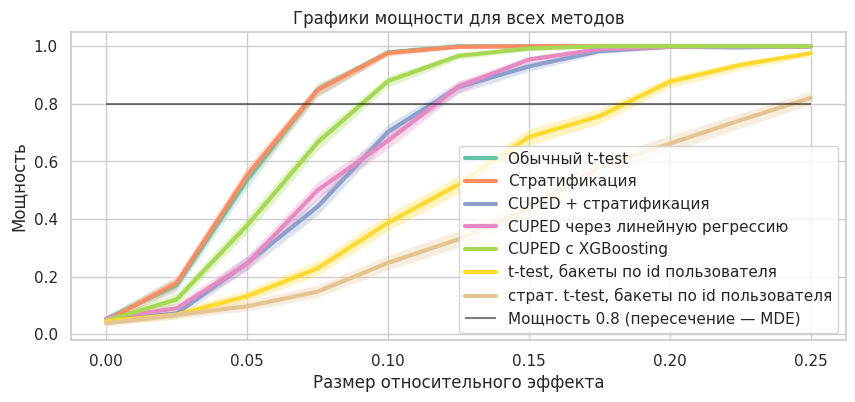

In [373]:
labels = [
    "Обычный t-test",
    "Cтратификация",
    "CUPED + стратификация",
    "CUPED через линейную регрессию",
    "CUPED с XGBoosting",
    "t-test, бакеты по id пользователя",
    "страт. t-test, бакеты по id пользователя",
]

draw_power(
    [powers0, powers1, powers2, powers4, powers5, powers6, powers7],
    [left_bounds0, left_bounds1, left_bounds2, left_bounds4, left_bounds5, left_bounds6, left_bounds7],
    [right_bounds0, right_bounds1, right_bounds2, right_bounds4, right_bounds5, right_bounds6, right_bounds7],
    effects_list=effects_list,
    label=labels,
    title="Графики мощности для всех методов",
    new_figure=True
)

**Выводы:** Как видим, примение бактов значительно ухудшило мощность t-test-ов. Вероятно это связано с повышенной дисперсией внутри бакета.



---

### Задача 4.


Рассмотрим <a href="https://www.kaggle.com/datasets/aslanahmedov/walmart-sales-forecast">данные</a> о продажах 45 супермаркетов торговой сети Walmart с 2010 по 2012 годы. Датасет содержит 4 файла:
* `features.csv` &mdash; информация по неделям о средней температуре воздуха, цене на топливо, а также различная информация о рекламных акциях Walmart;

* `stores.csv` &mdash; информация о размере магазинов;

* `train.csv` &mdash; информация о недельных продажах для каждого отдела каждого магазина;

* `test.csv` &mdash; в данной задаче не требуется.

**Цель:** построить дизайн АБ-теста и ответить на вопрос, сколько магазинов потребуется для проведения AB-теста.

**Срок АБ-теста:** от 4 до 8 недель.

**Ожидаемый эффект:** +5% к продажам магазина суммарно по всем отделам.

---

Нужно попробовать и сравнить разные подходы CUPED и стратификации, используя различные варианты дополнительных данных:
* без использования доп. данных, то есть простой t-test;
* данные о продажах предпериода, то есть стандартный CUPED;
* категориальные признаки, то есть простая стратификация;
* вещественные признаки, то есть CUPED при использовании различных ковариат;
* прогнозирование продаж с помощью различных моделей (CUPAC):
    * линейные модели;
    * градиентный бустинг;
    * нейронные сети.
    
Для построения нейронных сетей можно, например, использовать исторические данные продаж по разным отделам одного/нескольких магазинов для прогнозирования суммарной выручки за следующий период одного/нескольких магазинов. Можно дополнительно использовать другие признаки. Используйте любые подходящие архитектуры нейронных сетей.

*Внимание!* В данных представлено достаточно мало магазинов, поэтому *честную валидацию скорее всего выполнить не получится*. Используя имеющиеся данные <u><b>требуется только как можно больше уменьшить дисперсию, которая участвует в формуле MDE</b></u>.


Во всех случаях можно использовать любые реализации методов понижения дисперсии, в том числе через линейную регрессию.

In [374]:
train = pd.read_csv("archive(2)/train.csv")
stores = pd.read_csv("archive(2)/stores.csv")
features = pd.read_csv("archive(2)/features.csv")

In [375]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [376]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [377]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [378]:
train["Date"] = pd.to_datetime(train["Date"])
features["Date"] = pd.to_datetime(features["Date"])
train.rename(columns={"Weekly_Sales": "sample"}, inplace=True)

Объединим полученные датафреймы

In [379]:
merged_df = pd.merge(train, features, on=['Date', 'Store'])
general_df = pd.merge(merged_df, stores, on='Store')
general_df.head()

,Store,Dept,Date,sample,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [380]:
general_df["MarkDown1"].value_counts()

MarkDown1
1.50       102
460.73     102
175.64      93
9264.48     75
1483.17     75
          ... 
196.40      42
243.47      42
512.15      42
318.51      42
945.96      42
Name: count, Length: 2277, dtype: int64

In [381]:
general_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   sample        421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  IsHoliday_y   421570 non-null  bool          
 15  Type          421

In [382]:
general_df.rename(columns={"IsHoliday_x": "IsHoliday", "Weekly_Sales":"sample"}, inplace=True)
general_df["Date"] = pd.to_datetime(general_df["Date"])

Посмотрим, какую выборку необходимо взять, чтобы получить желаемый MDE в 5%

In [383]:
mde = 0.05 * general_df["sample"].mean()
alpha = 0.05
beta = 0.8
var_x = np.std(general_df["sample"], ddof=1) ** 2

def get_sample_size(alpha, beta, mde, var_x, var_y=var_x):
    '''Расчитывает размер выборки для детектирование MDE
    
    :param alpha: желаемая вероятность ошибки первого рода
    :param beta: желаемая мощность
    :param mde: необходимый эффект
    :param var_x, var_y: дисперсии выборок
    :returns: необходимый размер выборки
    '''
    
    q_sum = sps.norm.ppf(1 - alpha) + sps.norm.ppf(beta)
    return np.ceil((q_sum ** 2) * (var_x + var_y) / (mde * mde)).astype(int)

sample_size = get_sample_size(alpha, beta, mde, var_x)
sample_size += 1000
sample_size

10989

Таким образом, нам достаточно оставить порядка 20 тысяч элементов для теста и контроля. Для уверенности возьмем 30 тысяч.

In [384]:
sampled_df = general_df.sample(n=30000, random_state=42)
sampled_df.head()

,Store,Dept,Date,sample,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
272342,28,40,2012-01-06,50932.42,False,50.43,3.599,5155.86,19549.51,218.29,636.73,5218.50,130.157516,12.187,False,A,206302
176581,18,93,2012-03-09,3196.12,False,38.10,3.876,7410.18,368.19,25.46,1852.39,2332.07,137.506690,8.075,False,B,120653
354212,38,4,2011-05-27,10125.03,False,76.67,4.087,NaN,NaN,NaN,NaN,NaN,129.062355,13.736,False,C,39690
281444,29,33,2010-03-12,3311.26,False,43.43,2.805,NaN,NaN,NaN,NaN,NaN,131.784000,10.064,False,B,93638
124208,13,52,2010-10-29,6335.65,False,45.12,2.841,NaN,NaN,NaN,NaN,NaN,126.436419,7.795,False,A,219622


1. Обычный t-test

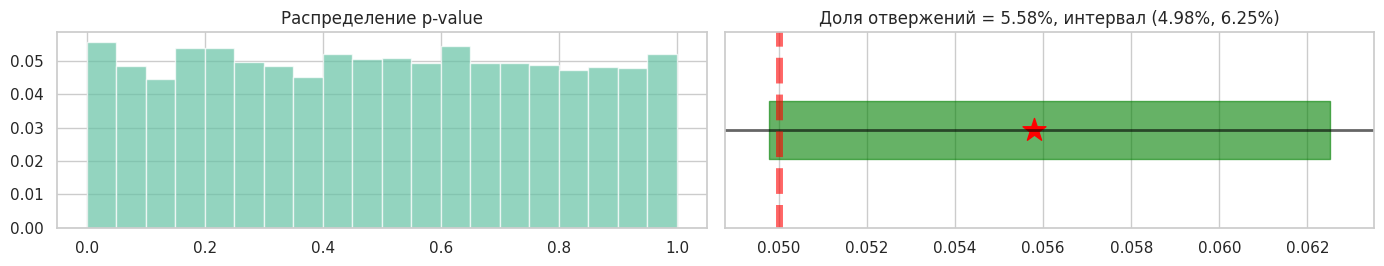

(0.0558, (0.049772048527119625, 0.06250997788086914))

In [385]:
run_experiments(
    test=lambda x, y: sps.ttest_ind(x["sample"], y["sample"]),
    data=sampled_df,
    generate_samples=random_sampler,
    sample_size=sample_size,
    n_iter=n_iter,
    draw=True,
)

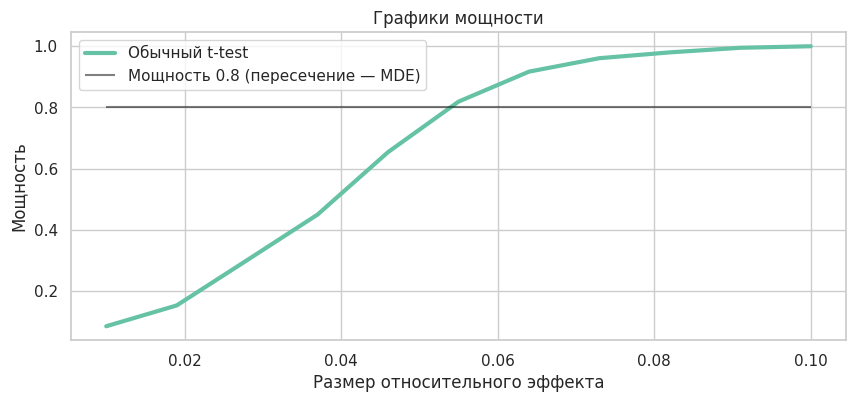

In [386]:
effects_list = np.linspace(0.01, 0.1, 11)

powers41, left_bounds41, right_bounds41 = estimate_power(
    test=lambda x, y: sps.ttest_ind(x["sample"], y["sample"]),
    data=sampled_df,
    generate_samples=random_sampler,
    sample_size=sample_size,
    n_iter=n_iter_power,
    effects_list=effects_list,
)

draw_power(
    powers41,
    powers41,
    powers41,
    label="Обычный t-test",
    new_figure=True,
    effects_list=effects_list,
)

Как видим, мы почти достигаем желаемого уровня MDE.

2. Стандартный CUPED

In [387]:
def simple_ttest_var(var1, var2, cov):
    """Формула дисперсии абсолютного t-test"""

    return var1 + var2 - 2 * cov


def relative_ttest_var(mean1, mean2, var1, var2, cov):
    """Формула дисперсии относительного t-test"""

    return var1 / mean2**2 + var2 * mean1**2 / mean2**4 - 2 * cov * mean1 / mean2**3


def cuped_transform(
    x_data,
    y_data,
    sample_name="sample",
    cuped_name="cuped",
    covariate_name="covariate",
    paired=False,
    return_theta=False,
):
    """
    Выполняет CUPED-преобразование.

    :param x_data: данные тестовой группы
    :param y_data: данные контрольной группы
    :param sample_name: имя столбца с целевым признаком
    :param cuped_name: имя столбца, в который записать преобразование
    :param covariate_name: имя столбца-ковариаты
    :param paired: являются ли выборки парными
    :param return_theta: возвращать ли значение theta
    :return: таблицы с добавленными столбцами и theta
    """

    # Случай парных выборок
    if paired:
        theta = (
            np.cov(
                x_data[covariate_name] - y_data[covariate_name],
                x_data[sample_name] - y_data[sample_name],
            )[0, 1]
        ) / ((x_data[covariate_name] - y_data[covariate_name]).var(ddof=0))

    # Случай независимых выборок
    else:
        theta = (
            np.cov(x_data[covariate_name], x_data[sample_name])[0, 1]
            + np.cov(y_data[covariate_name], y_data[sample_name])[0, 1]
        ) / (x_data[covariate_name].var(ddof=0) + y_data[covariate_name].var(ddof=0))

    # Делаем преобразование
    x_data[cuped_name] = x_data[sample_name] - theta * x_data[covariate_name]
    y_data[cuped_name] = y_data[sample_name] - theta * y_data[covariate_name]

    if return_theta:
        return x_data, y_data, theta
    else:
        return x_data, y_data


def cuped_ttest(
    x_data,
    y_data,
    relative=True,
    cuped=True,
    paired=False,
    sample_name="sample",
    cuped_name="cuped",
    covariate_name="covariate",
    alpha=0.05,
):
    """
    Относительный t-test.

    Аргументы:
    x, y -- выборки одинакового размера
    alpha -- теор вероятность ошибки первого рода
    :param relative: использовать относительный тест или абсолютный
    :param cuped: применять ли cuped
    :param paired: являются ли выборки парными
    :param sample_name: имя столбца с целевым признаком
    :param cuped_name: имя столбца, в который записать преобразование
    :param covariate_name: имя столбца-ковариаты

    Возвращает:
    stat -- статистика критерия
    left_bound, right_bound -- границы дов. интервала
    pvalue
    """

    assert len(x_data) == len(y_data)

    x_data = x_data.copy()
    x_data.index = range(len(x_data))
    y_data = y_data.copy()
    y_data.index = range(len(y_data))

    if cuped:
        # Сделаем cuped-преобразование
        x_data, y_data = cuped_transform(
            x_data,
            y_data,
            sample_name=sample_name,
            cuped_name=cuped_name,
            covariate_name=covariate_name,
            paired=paired,
        )

    # Посчитаем все необходимые статистики
    x_mean = x_data.mean()
    y_mean = y_data.mean()
    x_mean_var = x_data.var(ddof=0) / len(x_data)
    y_mean_var = y_data.var(ddof=0) / len(y_data)
    xy_mean_var = (x_data - y_data).var(ddof=0) / len(y_data)

    # Имя столбца, которое будем использовать
    name = cuped_name if cuped else sample_name

    if relative:
        # Случай относительного теста
        stat = (x_mean[name] - y_mean[name]) / y_mean[sample_name]
        var = relative_ttest_var(
            mean1=x_mean[name] - y_mean[name],
            mean2=y_mean[sample_name],
            var1=xy_mean_var[name],
            var2=y_mean_var[sample_name],
            cov=np.cov(x_data[name] - y_data[name], y_data[sample_name])[0, 1]
            / len(x_data),
        )

    else:
        # Случай абсолютного теста
        stat = x_mean[name] - y_mean[name]
        var = simple_ttest_var(
            var1=x_mean_var[name],
            var2=y_mean_var[name],
            cov=np.cov(x_data[name], y_data[name])[0, 1] / len(x_data) if paired else 0,
        )

    # По полученным значениям статистики и дисперсии применим
    # стандартные характеристики нормального распределения
    std = np.sqrt(var)
    z_stat = stat / std
    pvalue = 2 * sps.norm.sf(np.abs(z_stat))

    q = sps.norm.ppf(1 - alpha / 2)
    left_bound = stat - q * std
    right_bound = stat + q * std

    return stat, pvalue, left_bound, right_bound

In [388]:
start_date = general_df["Date"].min()
end_date = general_df["Date"].max()
start_date, end_date

(Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

In [389]:
latest_df = general_df.nlargest(30000, "Date")

past_sales = general_df[~general_df.index.isin(latest_df.index)]
store_avg_sales = past_sales.groupby("Store")["sample"].mean().rename("avg_sample")
latest_df = latest_df.merge(store_avg_sales, on="Store", how="left")

latest_df.head()

,Store,Dept,Date,sample,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,avg_sample
0,1,1,2012-10-26,27390.81,False,69.16,3.506,2585.85,31.75,6.0,1057.16,1305.01,223.444251,6.573,False,A,151315,21726.699768
1,1,2,2012-10-26,43134.88,False,69.16,3.506,2585.85,31.75,6.0,1057.16,1305.01,223.444251,6.573,False,A,151315,21726.699768
2,1,3,2012-10-26,9350.90,False,69.16,3.506,2585.85,31.75,6.0,1057.16,1305.01,223.444251,6.573,False,A,151315,21726.699768
3,1,4,2012-10-26,36292.60,False,69.16,3.506,2585.85,31.75,6.0,1057.16,1305.01,223.444251,6.573,False,A,151315,21726.699768
4,1,5,2012-10-26,25846.94,False,69.16,3.506,2585.85,31.75,6.0,1057.16,1305.01,223.444251,6.573,False,A,151315,21726.699768


In [390]:
latest_df.rename(columns={"avg_sample":"covariate"}, inplace=True)

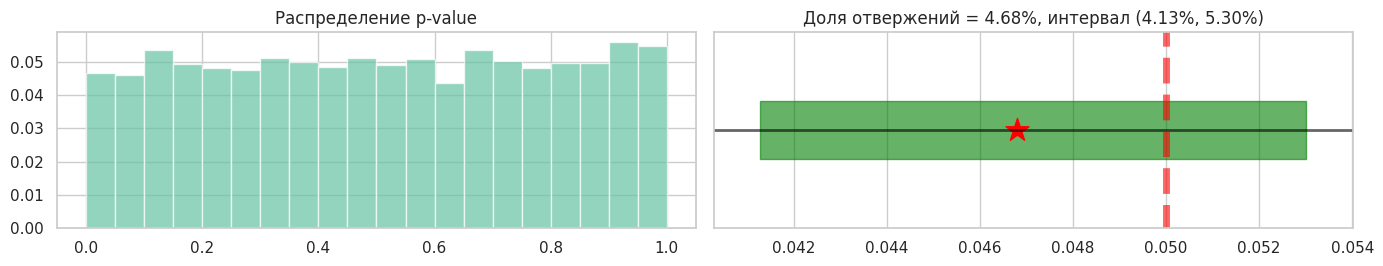

(0.0468, (0.04128549558366106, 0.053010349459338725))

In [391]:
run_experiments(
    test=lambda x, y: cuped_ttest(x[["sample", "covariate"]], y[["sample", "covariate"]]),
    data=latest_df,
    generate_samples=random_sampler,
    sample_size=sample_size,
    n_iter=n_iter,
    draw=True,
)

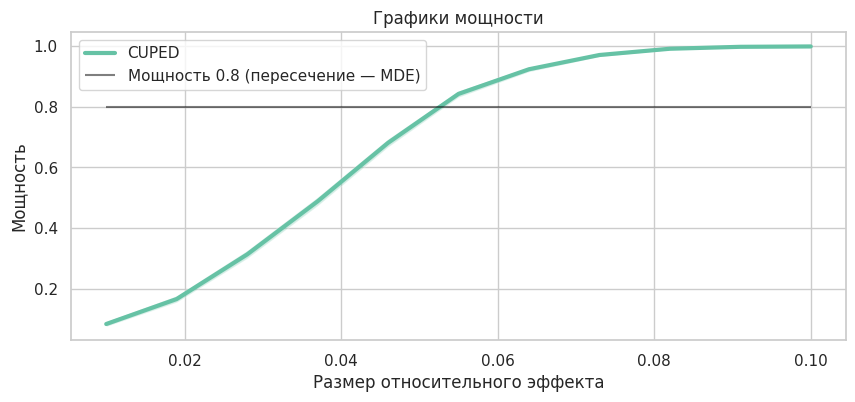

In [392]:
powers42, left_bounds42, right_bounds42 = estimate_power(
    test=lambda x, y: cuped_ttest(
        x[["sample", "covariate"]], y[["sample", "covariate"]]
    ),
    data=latest_df,
    generate_samples=random_sampler,
    sample_size=sample_size,
    n_iter=n_iter,
    effects_list=effects_list,
)

draw_power(
    powers42,
    left_bounds42,
    right_bounds42,
    label="CUPED",
    new_figure=True,
    effects_list=effects_list,
)

3. Простая стратификация

Дополнительно будем также выполнять CUPED

In [393]:
latest_df["strata"] = latest_df["Type"]

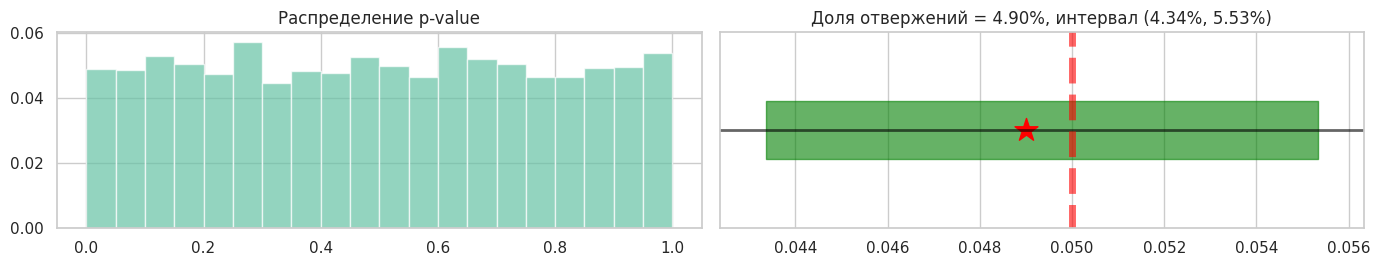

(0.049, (0.04335507170094735, 0.055337395453494184))

In [394]:
strata_weights = calculate_strata_weights(latest_df)
run_experiments(
    test=lambda x, y: stratified_cuped_ttest(x, y, strata_weights),
    data=latest_df,
    generate_samples=random_sampler,
    sample_size=sample_size,
    n_iter=n_iter,
    draw=True,
)

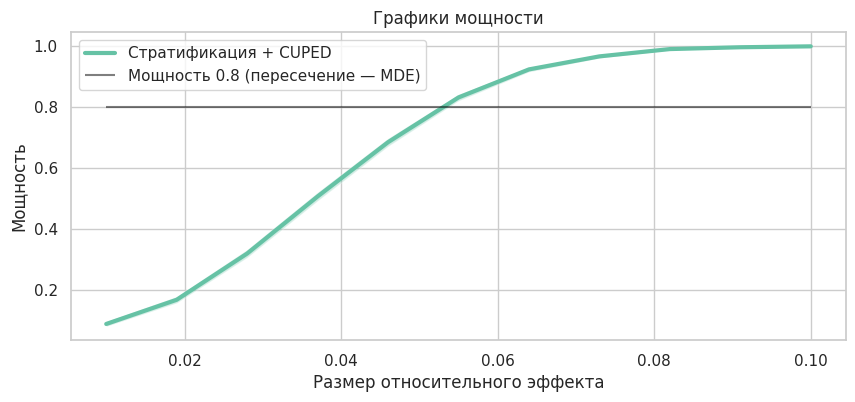

In [395]:
powers43, left_bounds43, right_bounds43 = estimate_power(
    test=lambda x, y: stratified_cuped_ttest(x, y, strata_weights),
    data=latest_df,
    generate_samples=random_sampler,
    sample_size=sample_size,
    n_iter=n_iter,
    effects_list=effects_list,
)

draw_power(
    powers43,
    left_bounds43,
    right_bounds43,
    label="Стратификация + CUPED",
    new_figure=True,
    effects_list=effects_list,
)

4. CUPED с вещественными признаками

In [396]:
latest_df["covariate_2"] = latest_df["Temperature"]
latest_df["covariate_3"] = latest_df["Fuel_Price"]

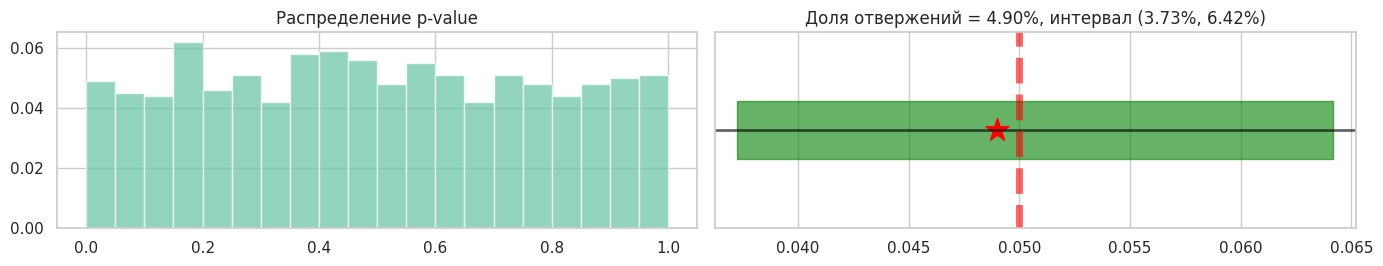

(0.049, (0.03726103464736061, 0.06419070150661013))

In [398]:
run_experiments(
    test=lambda x, y: regression_ttest_two_step_comb(
        x,
        y,
        covariate_names=["covariate", "covariate_2", "covariate_3"],
        strata_name="strata",
        strata_weights=strata_weights,
    ),
    data=latest_df,
    generate_samples=random_sampler,
    sample_size=sample_size,
    n_iter=1000,
    draw=True,
)

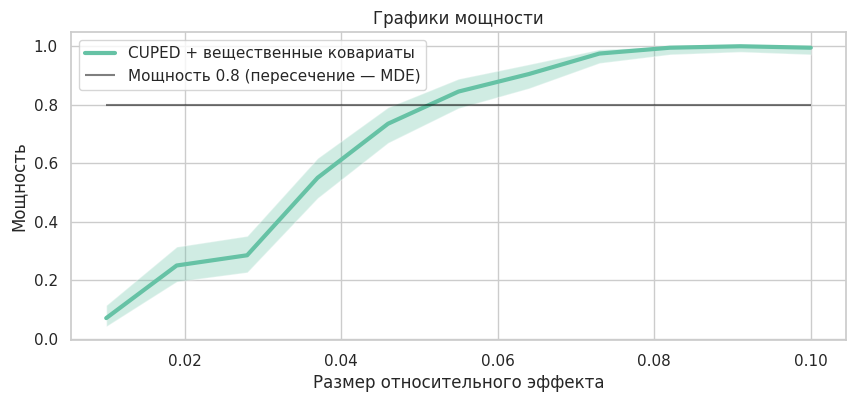

In [399]:
powers44, left_bounds44, right_bounds44 = estimate_power(
    test=lambda x, y: regression_ttest_two_step_comb(
        x,
        y,
        covariate_names=["covariate", "covariate_2", "covariate_3"],
        strata_name="strata",
        strata_weights=strata_weights,
    ),
    data=latest_df,
    generate_samples=random_sampler,
    sample_size=sample_size,
    n_iter=200,
    effects_list=effects_list,
)

draw_power(
    powers44,
    left_bounds44,
    right_bounds44,
    label="CUPED + вещественные ковариаты",
    new_figure=True,
    effects_list=effects_list,
)

5.1 Использование линейной модели

In [400]:
feature_names = ['Temperature', 'CPI', 'Unemployment', "Fuel_Price", "Size", "covariate"]
target_name = ["sample"]

In [401]:
lin_reg = LinearRegression()
lin_reg.fit(latest_df[feature_names], latest_df[target_name])

latest_df["lin_reg_pred"] = lin_reg.predict(latest_df[feature_names])

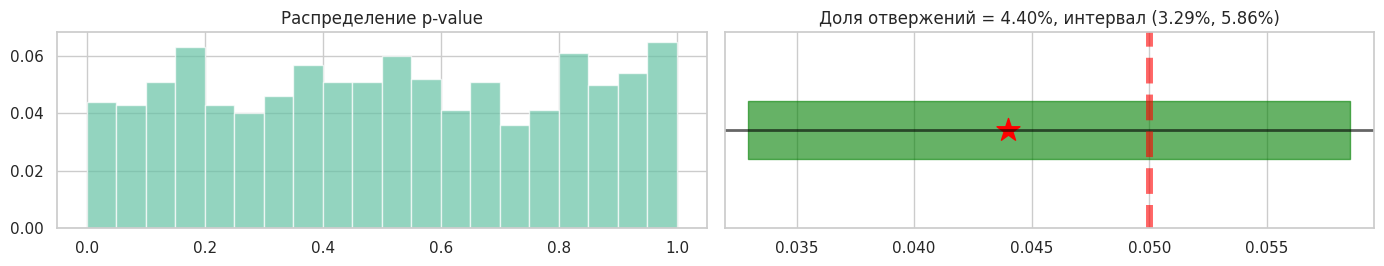

(0.044, (0.032938214588418495, 0.05855178915040778))

In [403]:
run_experiments(
    test=lambda x, y: regression_ttest_two_step_comb(
        x,
        y,
        covariate_names=["lin_reg_pred"],
        strata_name="strata",
        strata_weights=strata_weights,
    ),
    data=latest_df,
    generate_samples=random_sampler,
    sample_size=sample_size,
    n_iter=1000,
    draw=True,
)

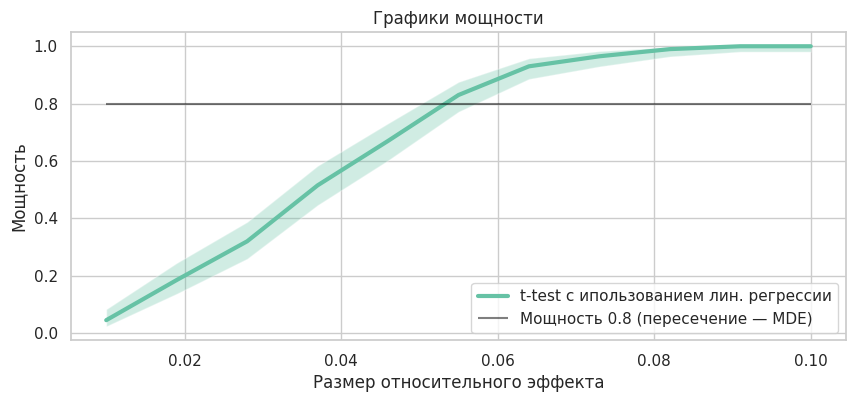

In [404]:
powers511, left_bounds511, right_bounds511 = estimate_power(
    test=lambda x, y: regression_ttest_two_step_comb(
        x,
        y,
        covariate_names=["lin_reg_pred"],
        strata_name="strata",
        strata_weights=strata_weights,
    ),
    data=latest_df,
    generate_samples=random_sampler,
    sample_size=sample_size,
    n_iter=200,
    effects_list=effects_list,
)

draw_power(
    powers511,
    left_bounds511,
    right_bounds511,
    label="t-test с ипользованием лин. регрессии",
    new_figure=True,
    effects_list=effects_list,
)

5.2 

In [405]:
boosting = XGBRegressor()
boosting.fit(latest_df[feature_names], latest_df[target_name])

latest_df["boosting_pred"] = boosting.predict(latest_df[feature_names])

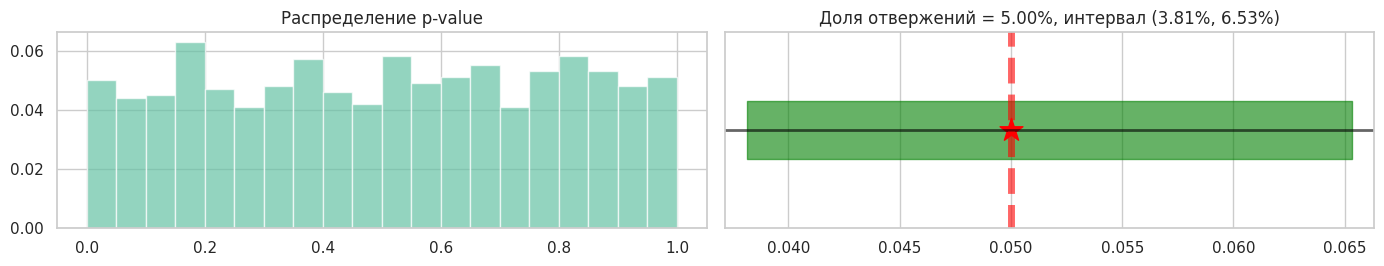

(0.05, (0.03813026239274881, 0.06531382024425081))

In [407]:
run_experiments(
    test=lambda x, y: regression_ttest_two_step_comb(
        x,
        y,
        covariate_names=["boosting_pred"],
        strata_name="strata",
        strata_weights=strata_weights,
    ),
    data=latest_df,
    generate_samples=random_sampler,
    sample_size=sample_size,
    n_iter=1000,
    draw=True,
)

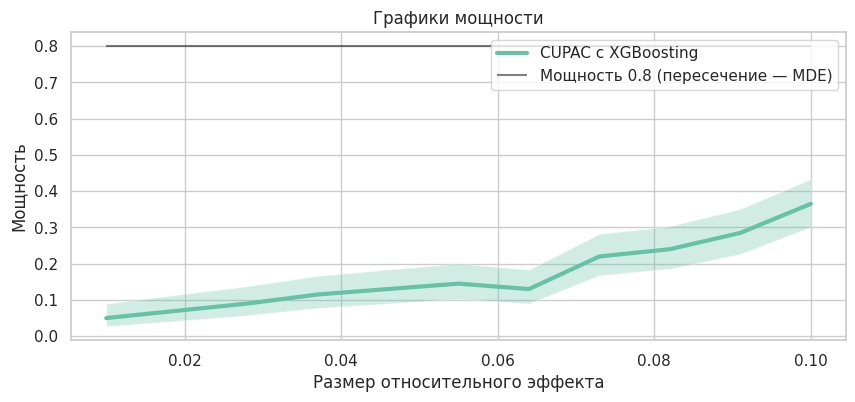

In [408]:
powers522, left_bounds522, right_bounds522 = estimate_power(
    test=lambda x, y: regression_ttest_two_step_comb(
        x,
        y,
        covariate_names=["boosting_pred"],
        strata_name="strata",
        strata_weights=strata_weights,
    ),
    data=latest_df,
    generate_samples=random_sampler,
    sample_size=n_iter_power,
    n_iter=200,
    effects_list=effects_list,
)

draw_power(
    powers522,
    left_bounds522,
    right_bounds522,
    label="CUPAC с XGBoosting",
    new_figure=True,
    effects_list=effects_list,
)

In [409]:
class FullyConnectedNN(nn.Module):
    def __init__(self, input_size):
        super(FullyConnectedNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 2048)
        self.fc2 = nn.Linear(2048, 512)
        self.fc3 = nn.Linear(512, 128)
        self.fc4 = nn.Linear(128, 32)
        self.fc5 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.fc5(x)
        return x

In [410]:
model = FullyConnectedNN(len(feature_names))

criterion = nn.MSELoss()  
optimizer = optim.Adam(model.parameters(), lr=0.0005)

In [411]:
latest_df.fillna(0, inplace=True)
x_train = torch.tensor(latest_df[feature_names].values).float()
y_train = torch.tensor(latest_df[target_name].values).float()

In [412]:
num_epochs = 20

model.train()
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    print(f"Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [0/20], Loss: 726267584.0000
Epoch [1/20], Loss: 496211104.0000
Epoch [2/20], Loss: 460401792.0000
Epoch [3/20], Loss: 505144064.0000
Epoch [4/20], Loss: 481890080.0000
Epoch [5/20], Loss: 454246368.0000
Epoch [6/20], Loss: 454295200.0000
Epoch [7/20], Loss: 460787776.0000
Epoch [8/20], Loss: 461996128.0000
Epoch [9/20], Loss: 456623008.0000
Epoch [10/20], Loss: 451612736.0000
Epoch [11/20], Loss: 452716960.0000
Epoch [12/20], Loss: 456066208.0000
Epoch [13/20], Loss: 456027872.0000
Epoch [14/20], Loss: 453069408.0000
Epoch [15/20], Loss: 451032256.0000
Epoch [16/20], Loss: 451512352.0000
Epoch [17/20], Loss: 453055584.0000
Epoch [18/20], Loss: 453349504.0000
Epoch [19/20], Loss: 452081696.0000


In [413]:
latest_df["nn_pred"] = model(x_train).detach().numpy()

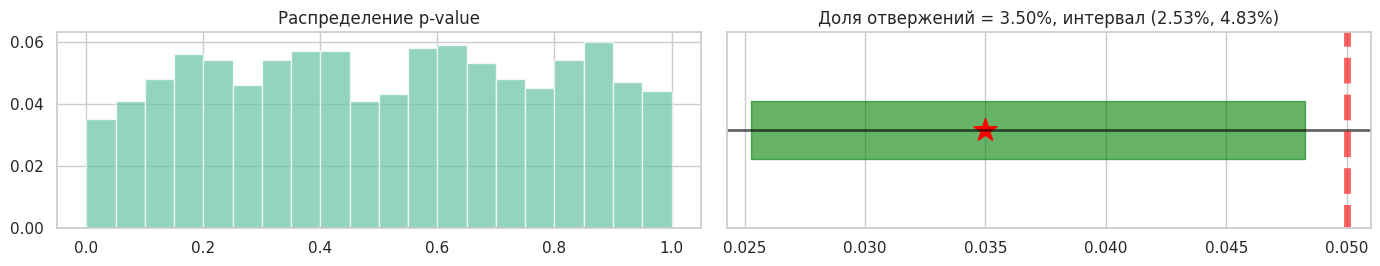

(0.035, (0.025272263017112946, 0.04828662237445334))

In [415]:
run_experiments(
    test=lambda x, y: regression_ttest_two_step_comb(
        x,
        y,
        covariate_names=["nn_pred"],
        strata_name="strata",
        strata_weights=strata_weights,
    ),
    data=latest_df,
    generate_samples=random_sampler,
    sample_size=sample_size,
    n_iter=1000,
    draw=True,
)

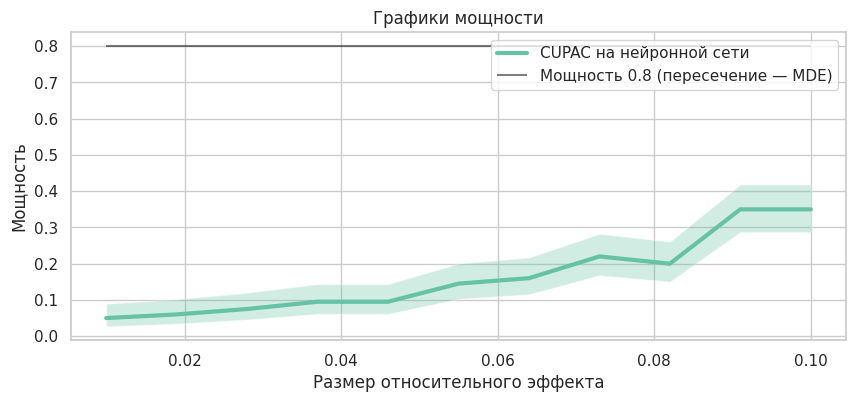

In [416]:
powers533, left_bounds533, right_bounds533 = estimate_power(
    test=lambda x, y: regression_ttest_two_step_comb(
        x,
        y,
        covariate_names=["nn_pred"],
        strata_name="strata",
        strata_weights=strata_weights,
    ),
    data=latest_df,
    generate_samples=random_sampler,
    sample_size=n_iter_power,
    n_iter=200,
    effects_list=effects_list,
)

draw_power(
    powers533,
    left_bounds533,
    right_bounds533,
    label="CUPAC на нейронной сети",
    new_figure=True,
    effects_list=effects_list,
)

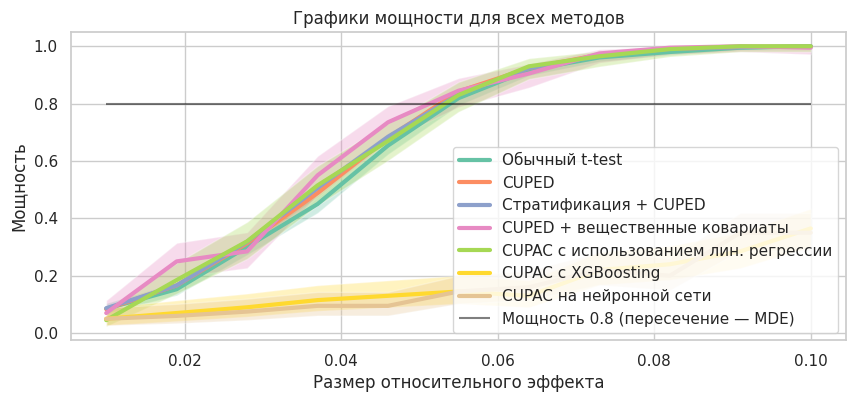

In [417]:
labels = [
    "Обычный t-test",
    "CUPED",
    "Стратификация + CUPED",
    "CUPED + вещественные ковариаты",
    "CUPAC с использованием лин. регрессии",
    "CUPAC с XGBoosting",
    "CUPAC на нейронной сети"
]

draw_power(
    [powers41, powers42, powers43, powers44, powers511, powers522, powers533],
    [left_bounds41, left_bounds42, left_bounds43, left_bounds44, left_bounds511, left_bounds522, left_bounds533],
    [right_bounds41, right_bounds42, right_bounds43, right_bounds44, right_bounds511, right_bounds522, right_bounds533],
    effects_list=effects_list,
    label=labels,
    title="Графики мощности для всех методов",
    new_figure=True
)

**Выводы:** Как видим, все методы, кроме последних двух достигли желаемого минимального эффекта, что подтверждает теоретическую оценку MDE.

CUPAC мог справиться хуже, так как не смог корректно обработать зависимости, а потому и вывести нужную ковариату